
<h1 align="center">Data Science Assignment (Tap That Job)📈</h1>
<hr style="border-top: 2px solid black; width: Data Science Assignment (Tap That Job); margin-top: 0.5em; margin-bottom: 0;">

 


# I. Data preparation & exploration

## A. Problem statement

> ***`The objective is to help the business officers to identify the most probable customers who are likely to churn and leave the bank. This is important because it is not feasible to target all customers due to the high costs involved, so it is necessary to identify the most at-risk customers and take action to keep them.`***


## B. Import libraries

In [110]:
import numpy as np # for linear algebra
import pandas as pd # for data processing, dataset reading etc
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import missingno as msno # for outliers,plots
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,roc_curve
import shap #explain the output of any machine learning model

## C. Read dataset

In [111]:
path='C:\\Users\\marius\\Desktop\\TTJ project\\dataset\\dataset.csv'

In [112]:
data=pd.read_csv(path)

## D. Exploratory data analysis

### 1. General

#### 1.1. View dimensions of dataset

In [113]:
data.shape

(10127, 21)

#### 1.2. Preview of dataset

In [114]:
data.head(12)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40.0,F,4.0,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44.0,M,2.0,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51.0,M,4.0,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32.0,M,0.0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37.0,M,3.0,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48.0,M,2.0,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


#### 1.3. View types of columns

In [115]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

#### 1.4. View information about dataset

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10124 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10122 non-null  float64
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10125 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### 1.5. View statistical properties of the 'object' type fields

In [117]:
data.describe(include = ['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10125,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3560,9436


### 2. Univariate analysis

>*We want to analyze our target variable* ***`Attrition_flag`***

#### 2.1. Check if variable has missing values

In [118]:
data['Attrition_Flag'].isnull().sum()

0

#### 2.2. View unique values

In [119]:
data['Attrition_Flag'].nunique()

2

#### 2.3. View frequency of values and percentage of frequency

In [120]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

#### 2.4. Visualize frequency distribution of variable `Attrition_Flag` 📊

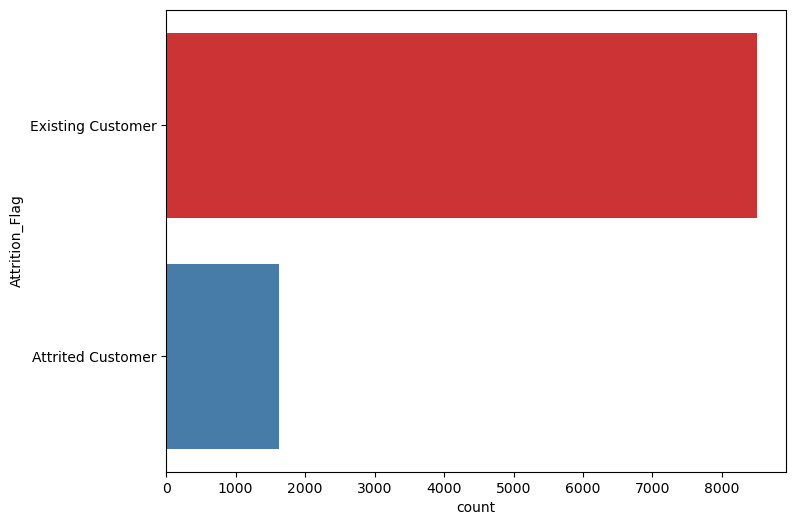

In [121]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data = data, y = 'Attrition_Flag', palette='Set1')

plt.show()

#### 2.5. Change labels of variable `'Attrition_Flag'` to numeric

In [122]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

In [123]:
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

### 3. Feature analysis

#### 3.1 Categorical variables

a) Explore categorical variables

In [124]:
#Find categorical variables
data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [125]:
#Select categorical variables
categorical_columns = [col for col in data.columns if data[col].dtypes == 'object']

In [126]:
print('There are', len(categorical_columns), 'categorical variables. These are:', categorical_columns)

There are 5 categorical variables. These are: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [127]:
data[categorical_columns].head(10)

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,NaN,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue
5,M,Graduate,Married,$40K - $60K,Blue
6,M,NaN,Married,$120K +,Gold
7,M,High School,NaN,$60K - $80K,Silver
8,M,Uneducated,Single,$60K - $80K,Blue
9,M,Graduate,Single,$80K - $120K,Blue


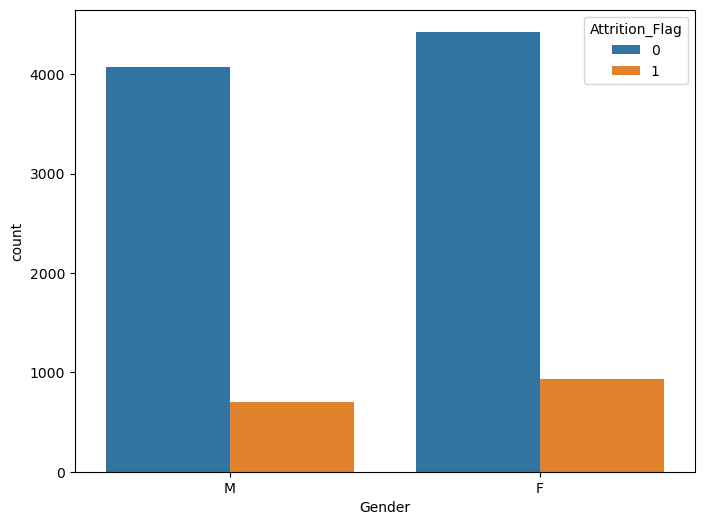

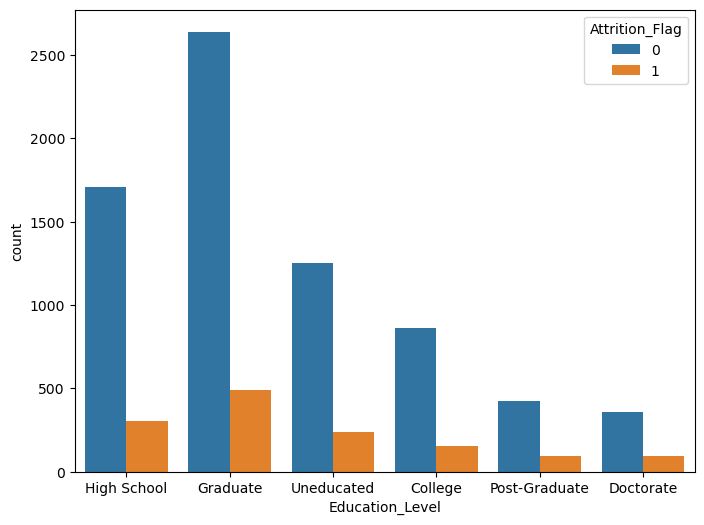

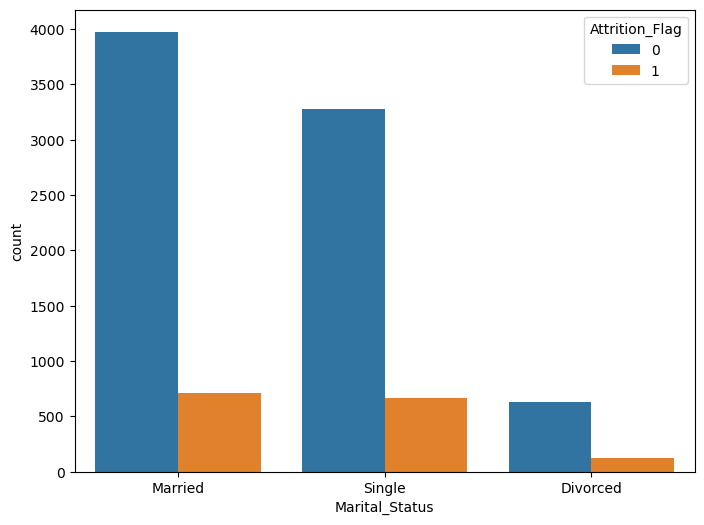

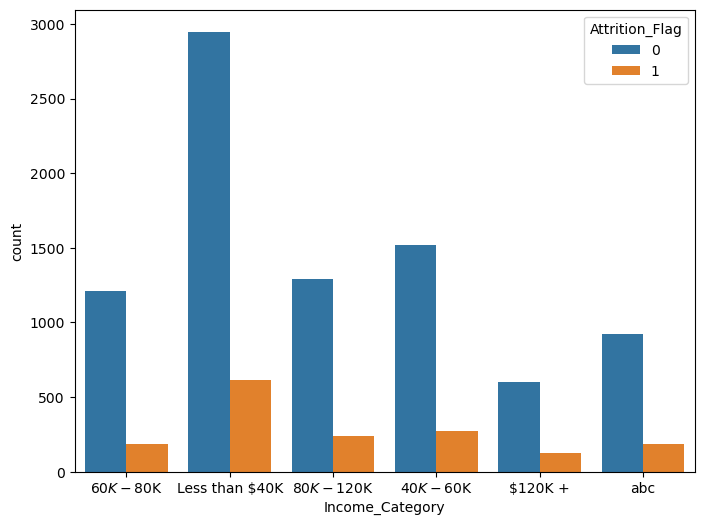

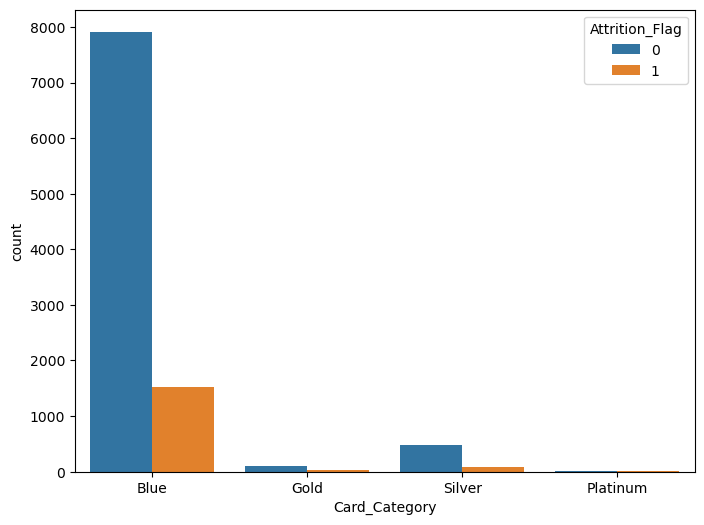

In [128]:
#Check distribution of categorical variables in relationship with target Attrition_Flag
for col in categorical_columns:
    fix,ax=plt.subplots(figsize=(8,6))
    ax=sns.countplot(data=data,x=col,hue = 'Attrition_Flag')
    plt.show()

In [129]:
#Check what categorical variables have missing values
data[categorical_columns].isnull().sum()

Gender                0
Education_Level    1519
Marital_Status      749
Income_Category       2
Card_Category         0
dtype: int64

<Axes: >

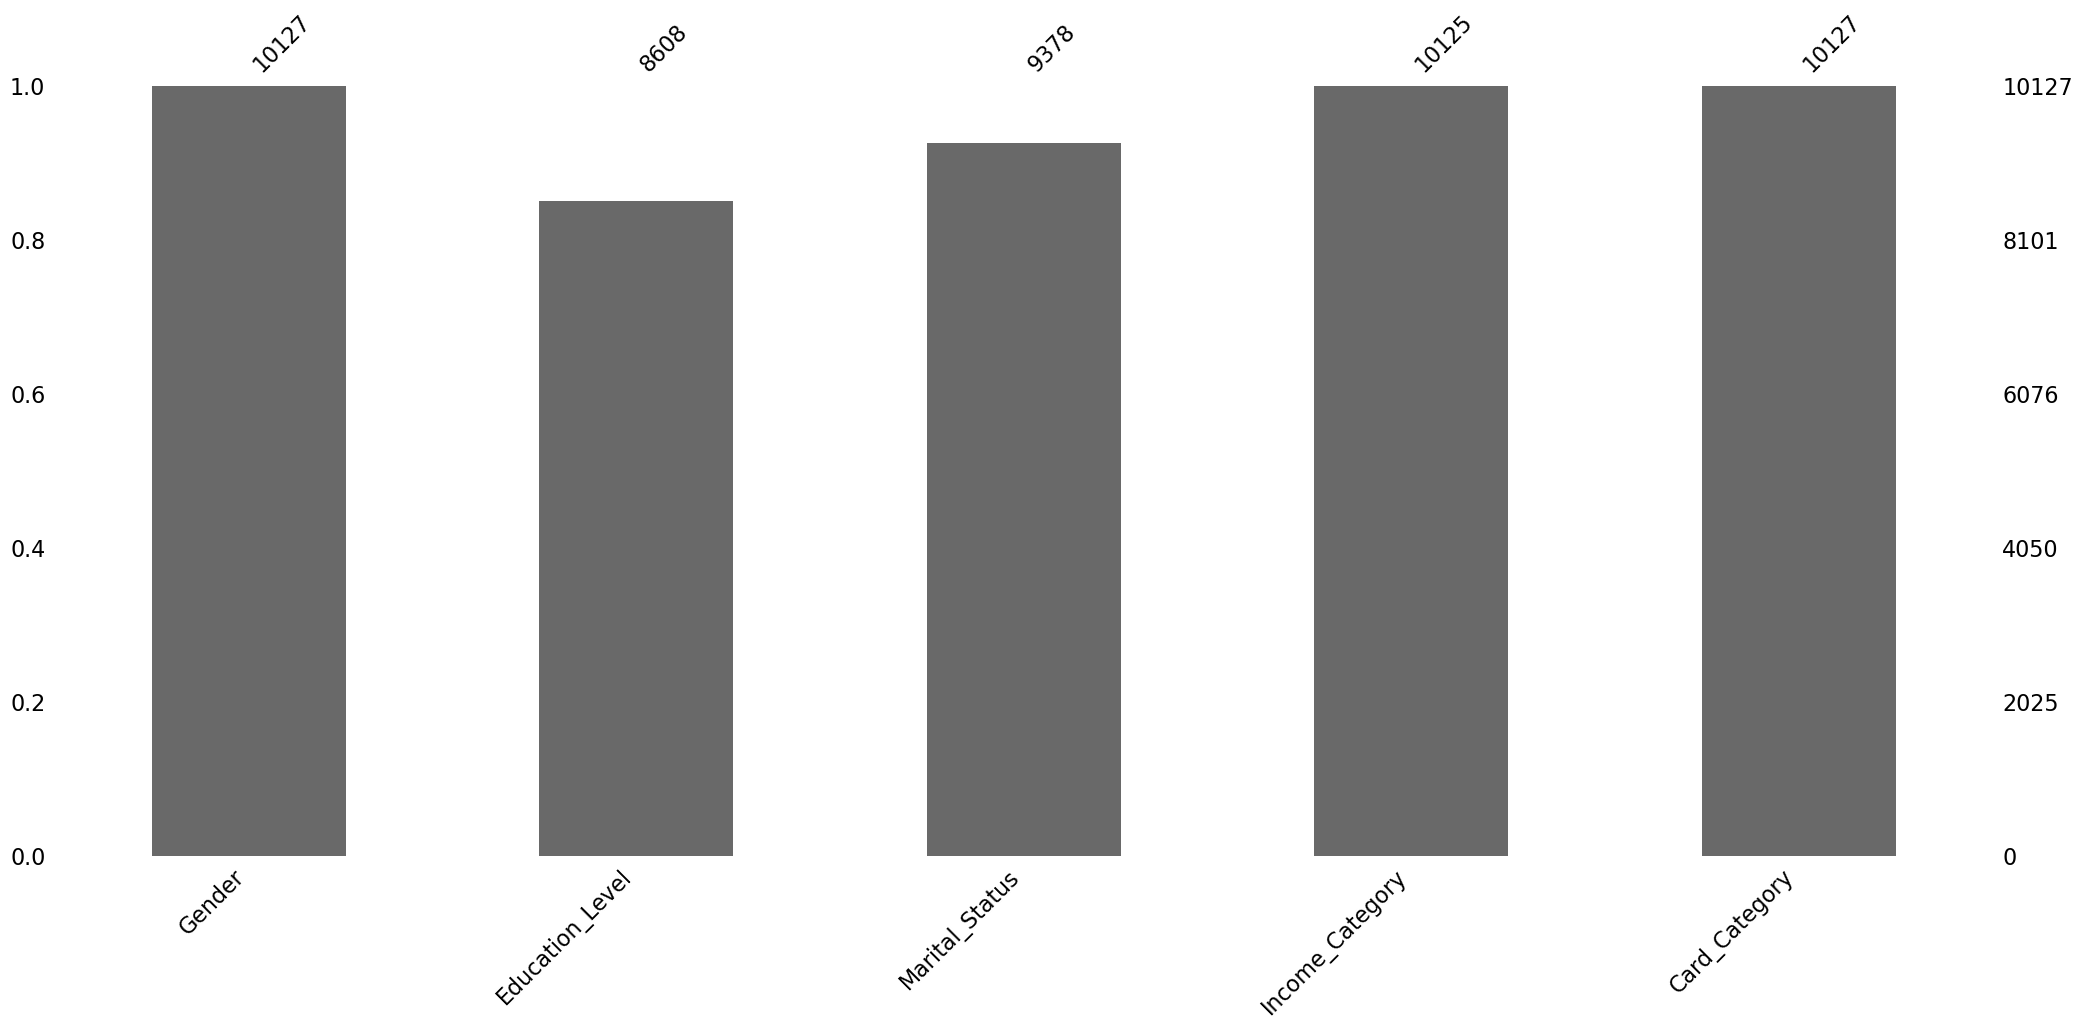

In [130]:
#Visualize missing values
msno.bar(data[categorical_columns])

In [131]:
#Visualize the number of records for variable 'Education_Level'
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [132]:
#Visualize the number of records for variable 'Marital_Status'
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [133]:
#Visualize the number of records for variable 'Income_Category'
data['Income_Category'].value_counts()

Less than $40K    3560
$40K - $60K       1789
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

*Input values for missing records*

In [134]:
data['Education_Level']=data['Education_Level'].fillna('Unknown')

In [135]:
data['Marital_Status']=data['Marital_Status'].fillna('Unknown')

In [136]:
data['Income_Category']=data['Income_Category'].fillna('abc')

 c) Feature variance

In [137]:
#We will look at columns with 1 single value
data[categorical_columns].nunique()

Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

We don't have columns with ==1 single value==

In [138]:
values1=data['Education_Level'].value_counts()/len(data)*100

In [139]:
#np.where
data['Education_Level']=np.where(data['Education_Level'].isin(values1.index[4:]),'Other education',data['Education_Level'])

In [140]:
data['Education_Level'].value_counts()/len(data)*100

Graduate           30.887726
High School        19.877555
Other education    19.551693
Unknown            14.999506
Uneducated         14.683519
Name: Education_Level, dtype: float64

In [141]:
data['Marital_Status'].value_counts()/len(data)*100

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

In [142]:
data['Income_Category'].value_counts()/len(data)*100

Less than $40K    35.153550
$40K - $60K       17.665646
$80K - $120K      15.157500
$60K - $80K       13.844179
abc               11.000296
$120K +            7.178829
Name: Income_Category, dtype: float64

### 3.2 Numerical variables

In [143]:
numerical_columns=[col for col in data.columns if data[col].dtypes!='object'and col!='Attrition_Flag']

In [144]:
print("There are",len(numerical_columns),'numerical columns. These are',numerical_columns)

There are 15 numerical columns. These are ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal', 'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


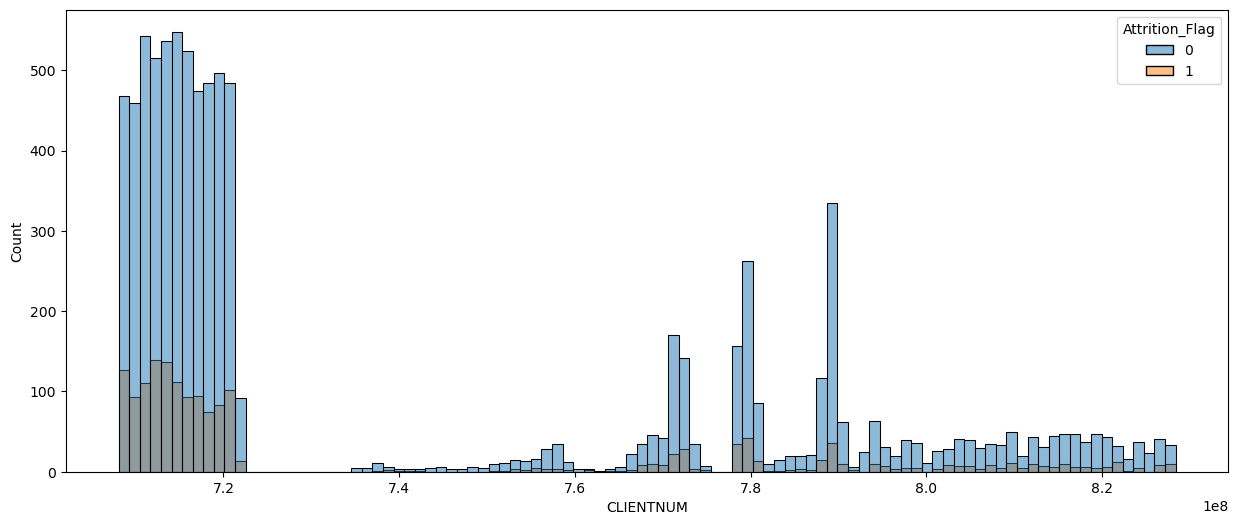

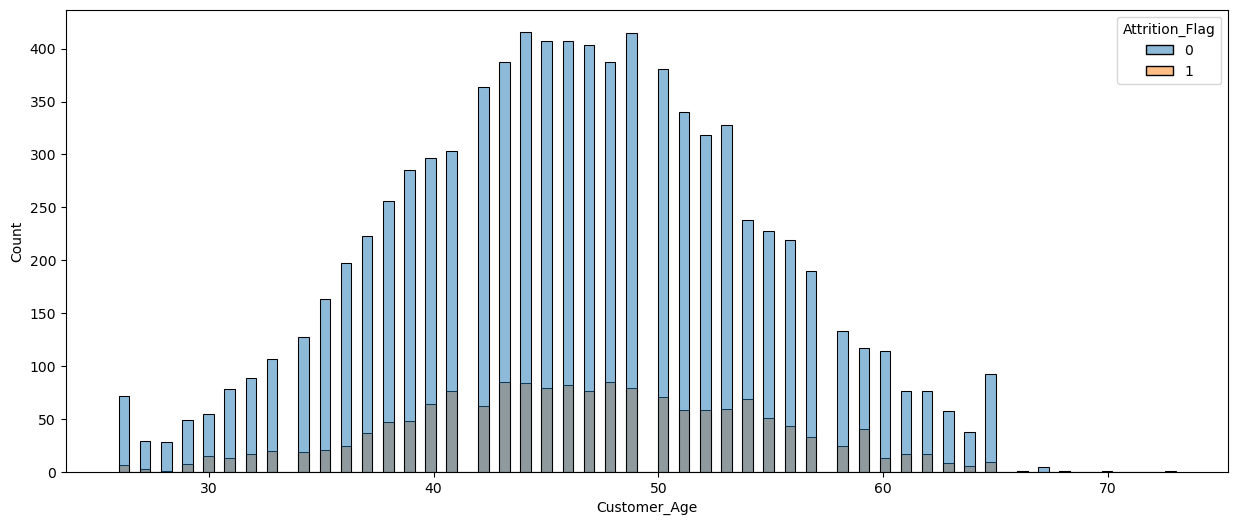

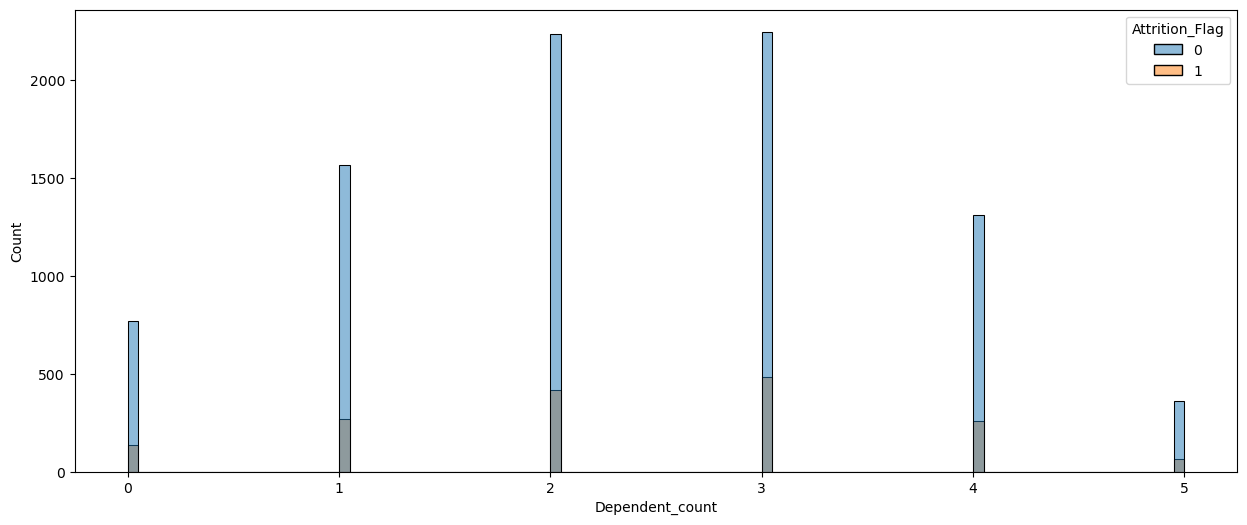

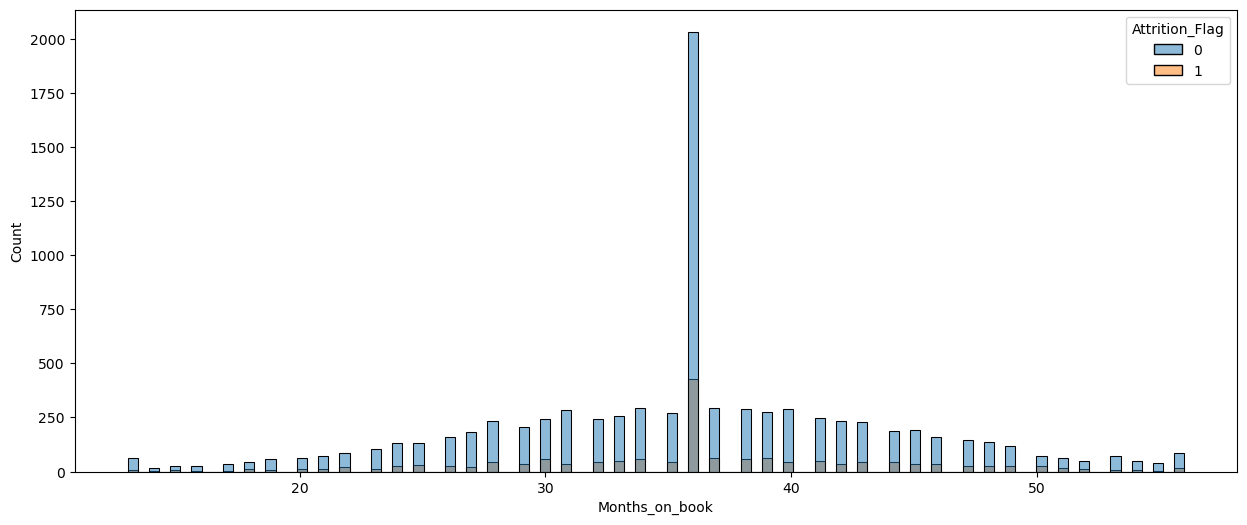

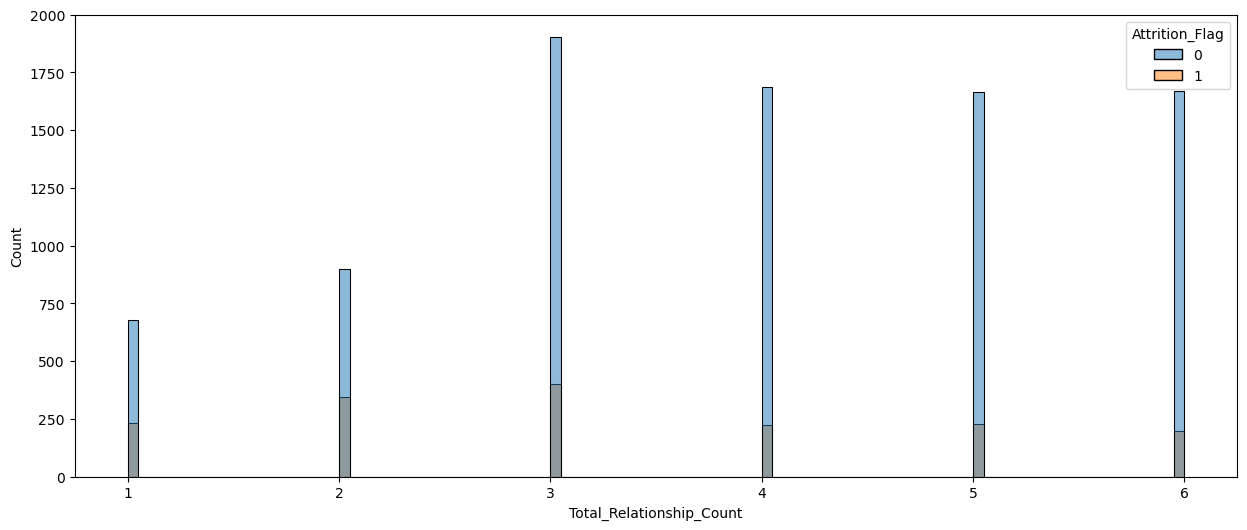

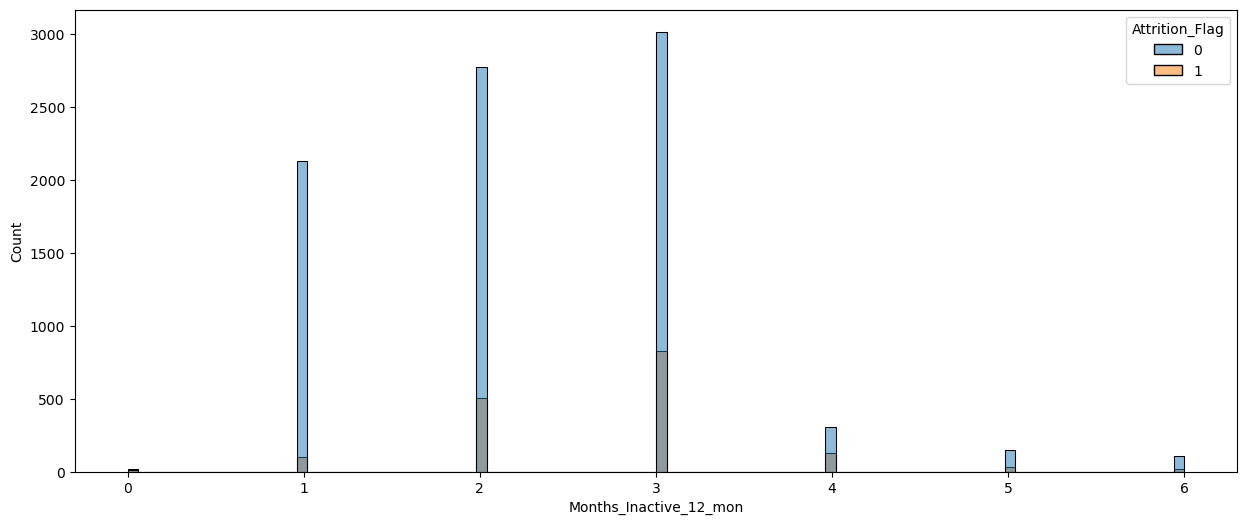

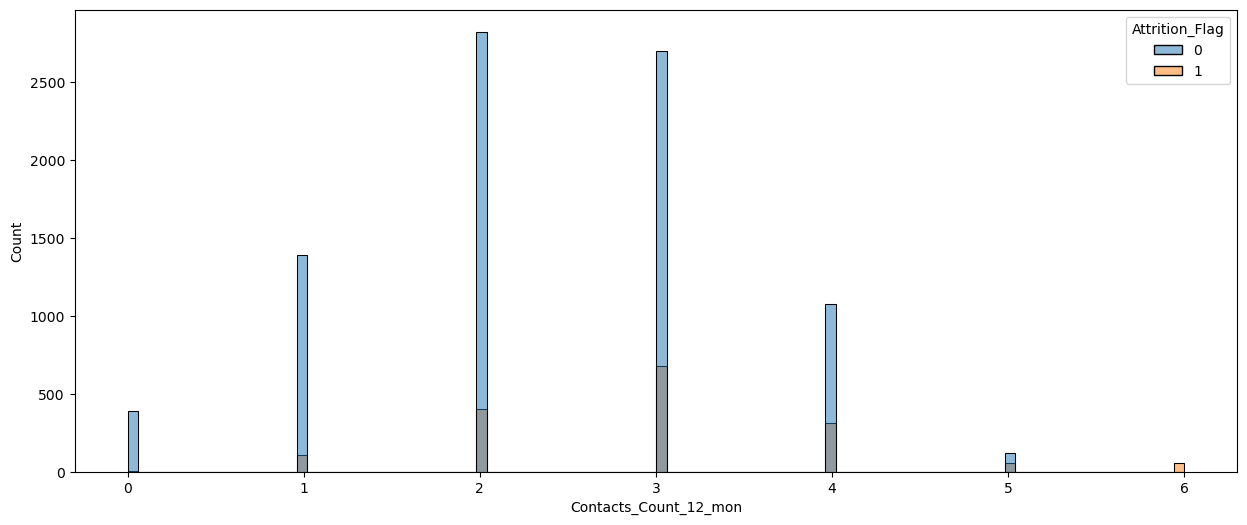

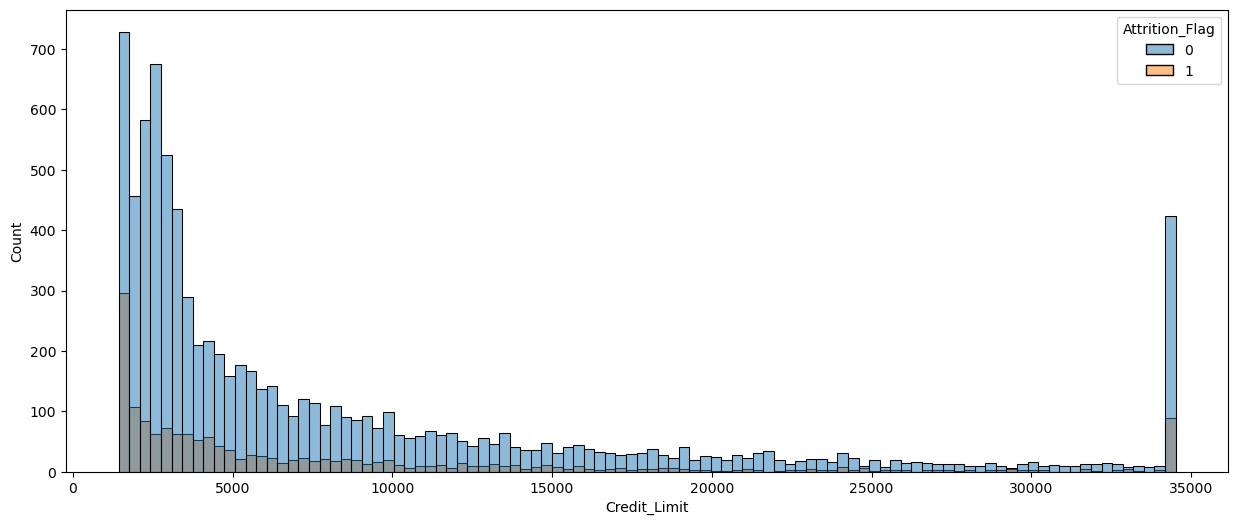

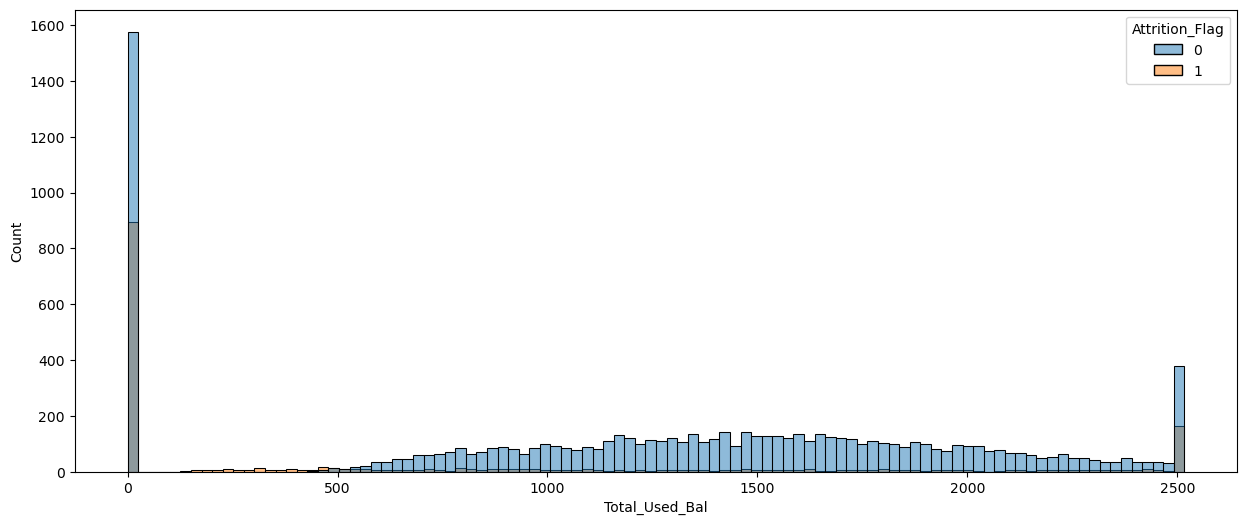

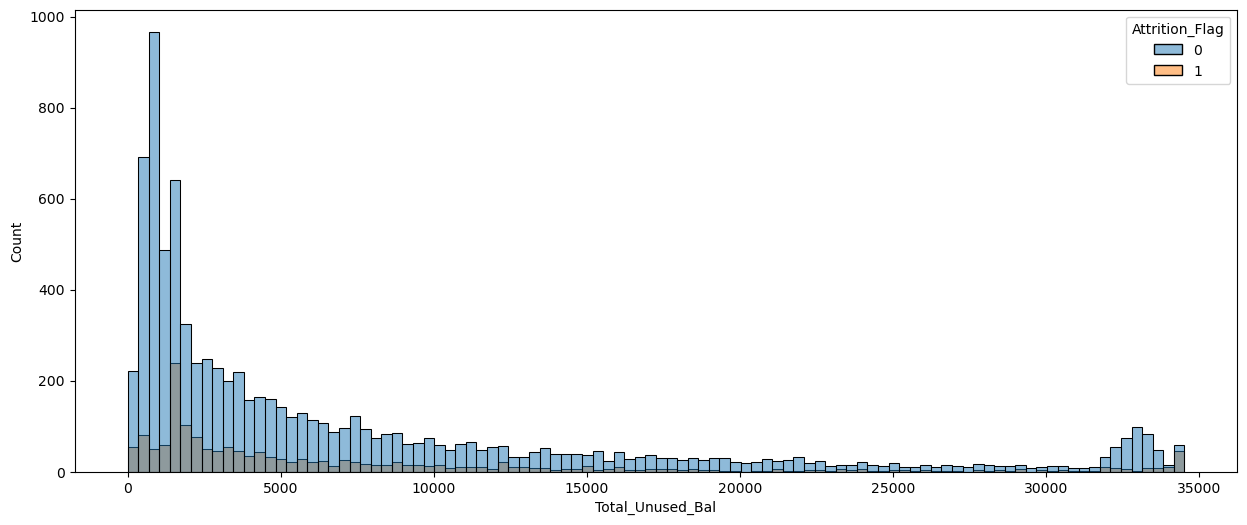

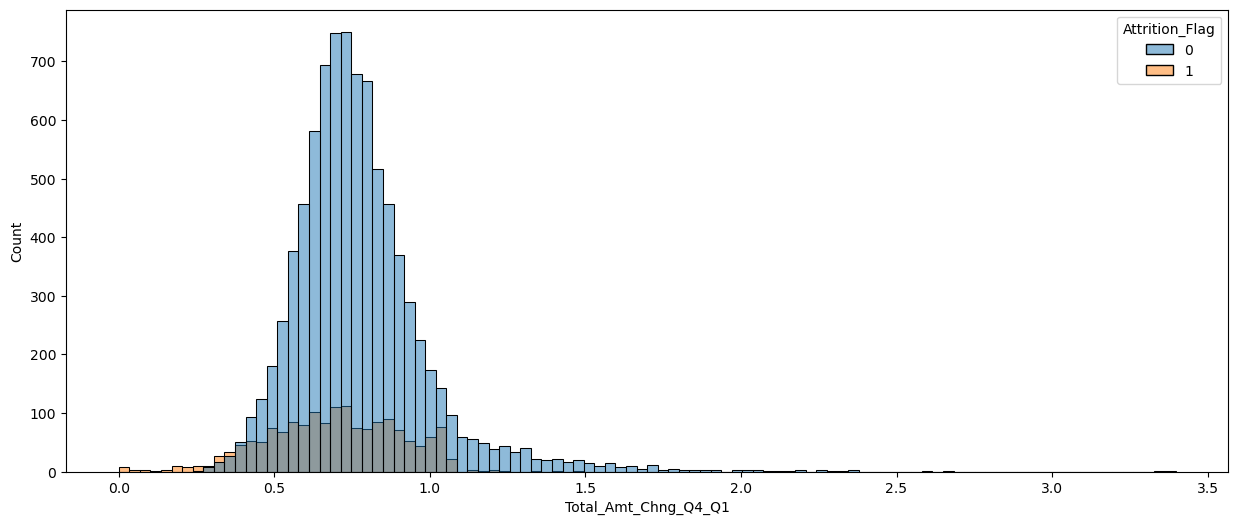

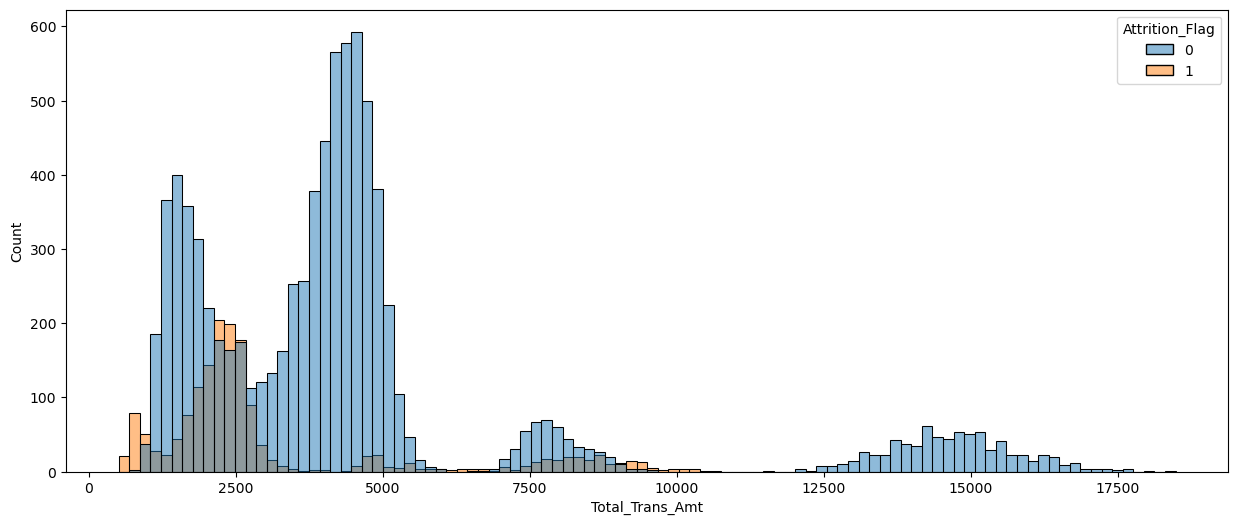

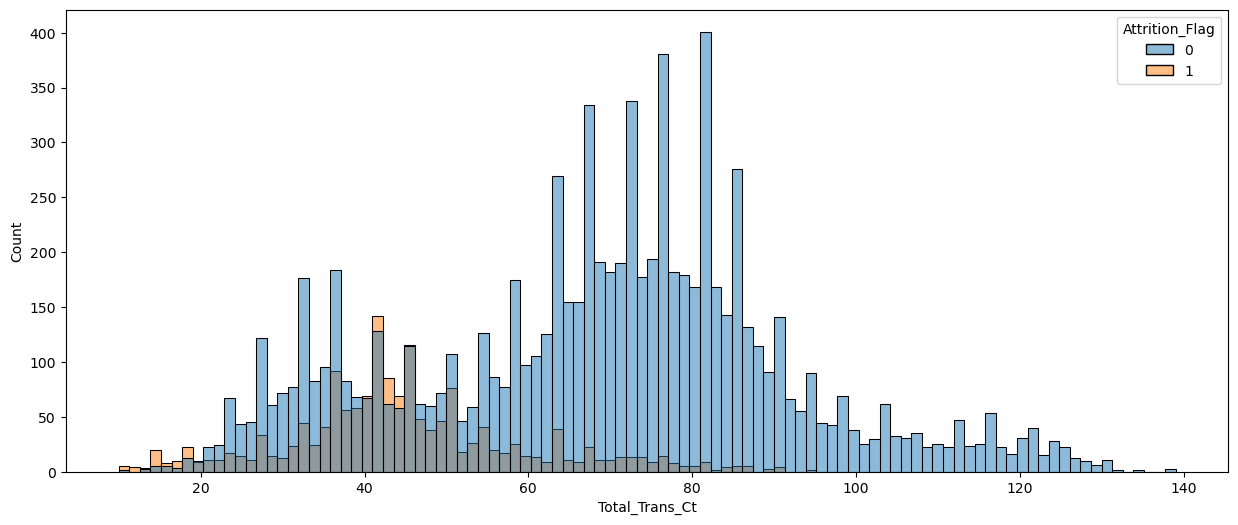

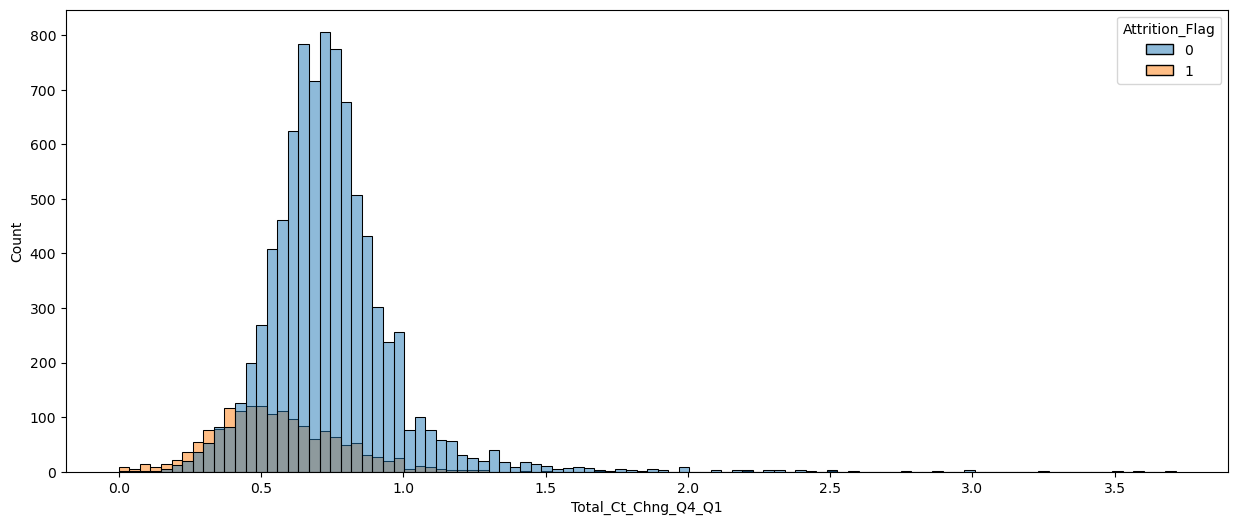

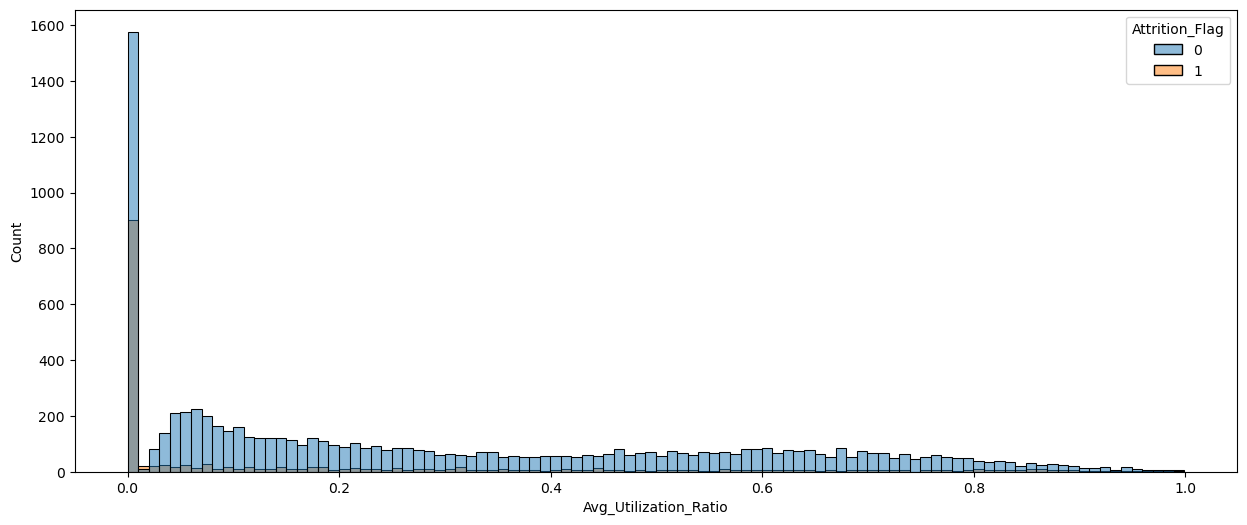

In [145]:
#graphics
for col in numerical_columns:
    fix,ax=plt.subplots(figsize=(15,6))
    sns.histplot(data=data,x=col,hue='Attrition_Flag',bins=100)
    plt.show()

b) Missing values imputation

In [146]:
data[numerical_columns].isnull().sum()

CLIENTNUM                   0
Customer_Age                3
Dependent_count             5
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Used_Bal              0
Total_Unused_Bal            0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<Axes: >

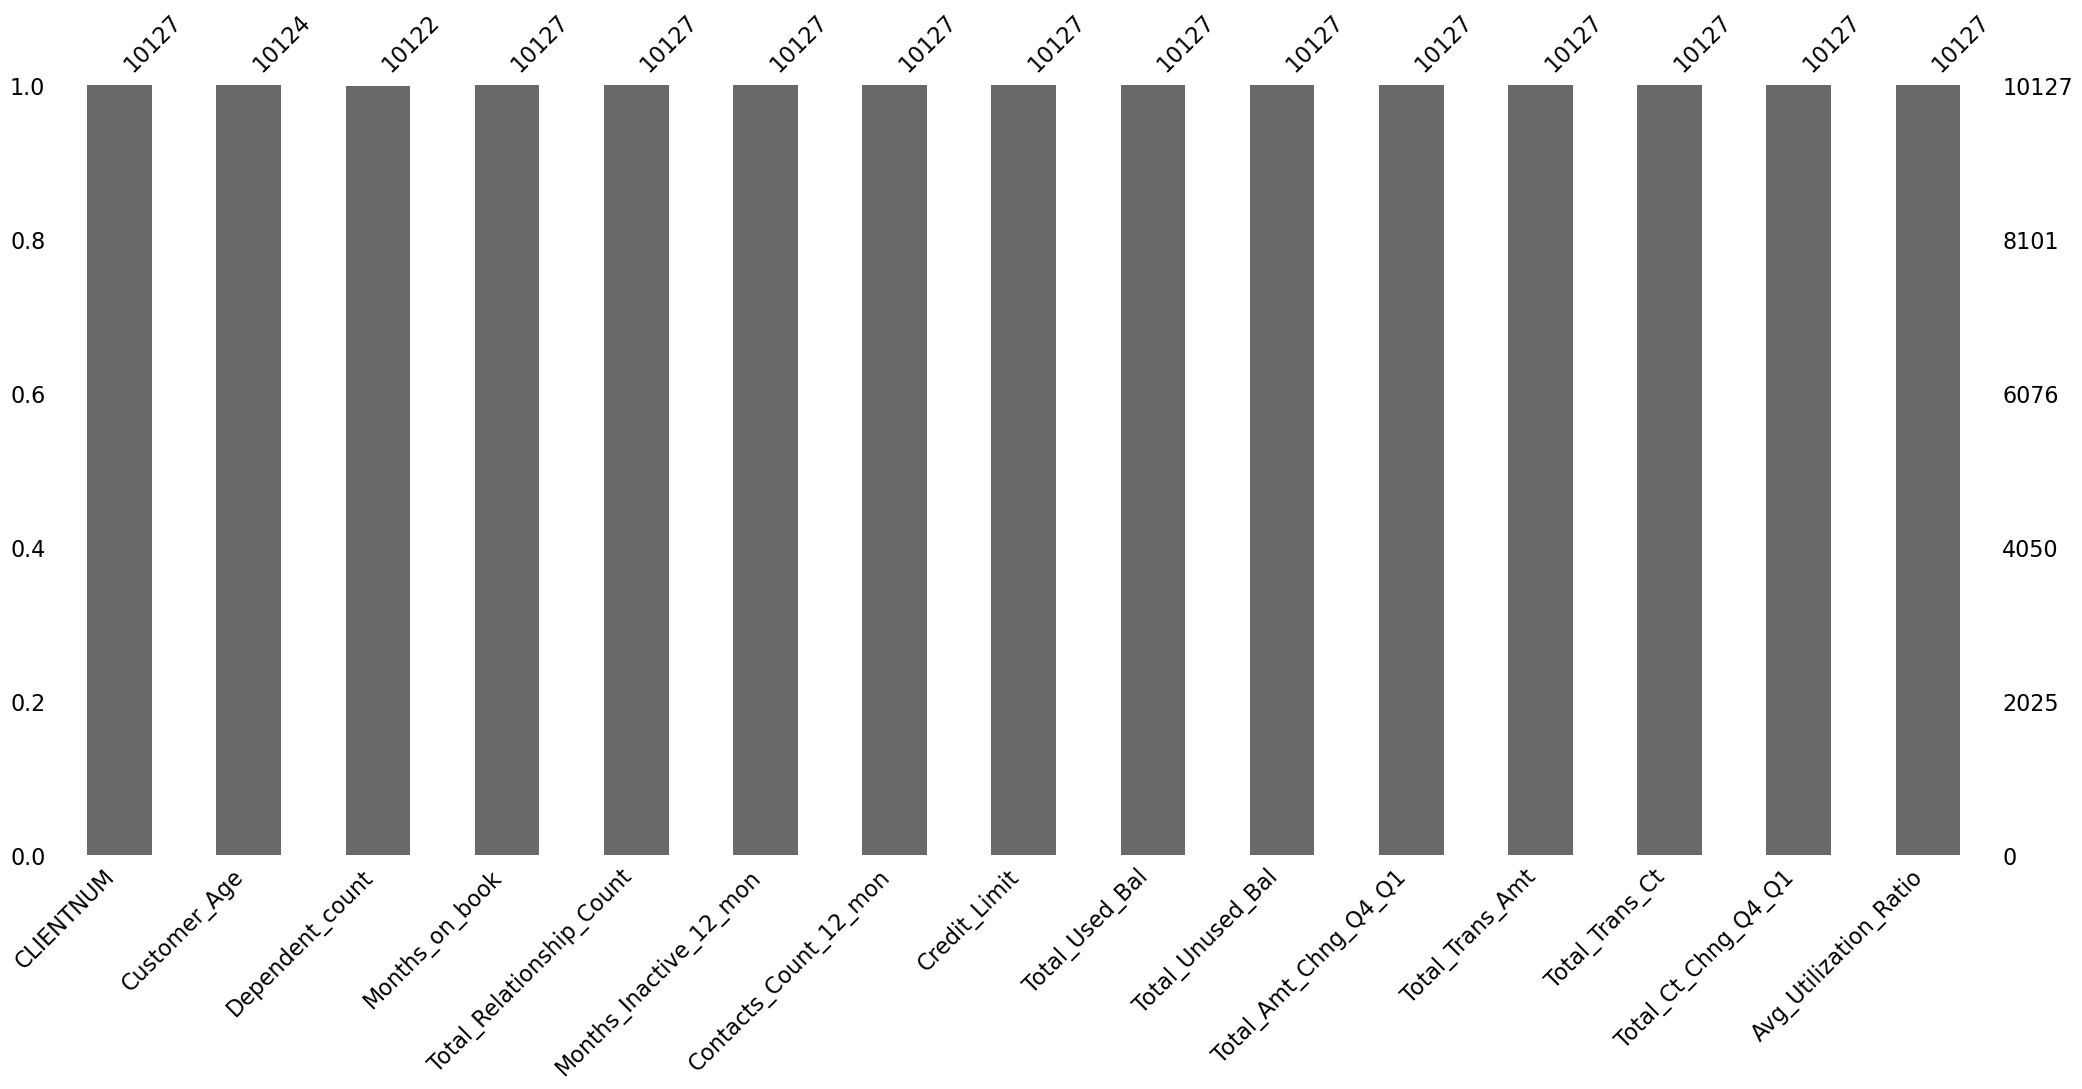

In [147]:
msno.bar(data[numerical_columns])

In [148]:
data['Customer_Age']

0        45.0
1        49.0
2        51.0
3        40.0
4        40.0
         ... 
10122    50.0
10123    41.0
10124    44.0
10125    30.0
10126    43.0
Name: Customer_Age, Length: 10127, dtype: float64

*Fill in the empty spaces with the median of the variable values*

In [149]:
data['Customer_Age']=data['Customer_Age'].fillna(data['Customer_Age'].median())

*Check if are any remaining missing values*

In [150]:
data['Customer_Age'].isnull().sum()

0

In [151]:
data['Dependent_count']=data['Dependent_count'].fillna(data['Dependent_count'].median())

In [152]:
data['Dependent_count'].isnull().sum()

0

 C) Feature variance

In [153]:
#Constant variables
data[numerical_columns].nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Used_Bal               1974
Total_Unused_Bal             6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

d) Outliers detection

In [154]:
q1=data['Credit_Limit'].quantile(0.25)
q3=data['Credit_Limit'].quantile(0.75)
IQR=q3-q1
lower_limit=q1-3*IQR
upper_limit=q3+3*IQR

In [155]:
data[(data['Credit_Limit']<lower_limit) | (data['Credit_Limit']>upper_limit) ]['Credit_Limit']

Series([], Name: Credit_Limit, dtype: float64)

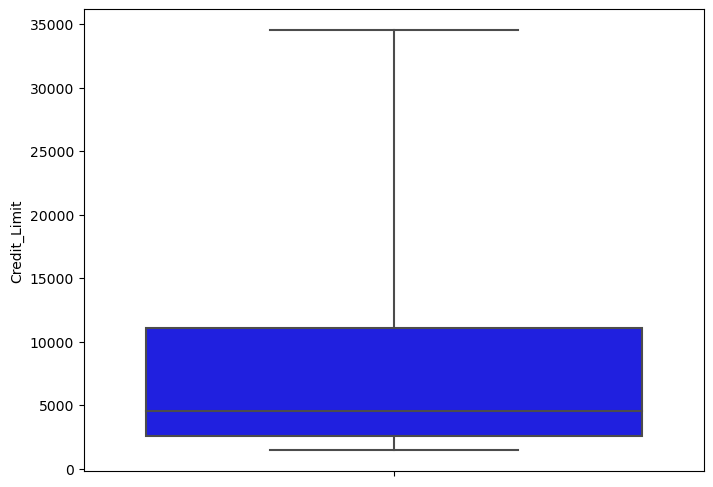

In [156]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(y=data['Credit_Limit'],color='blue',whis=3)
plt.show()

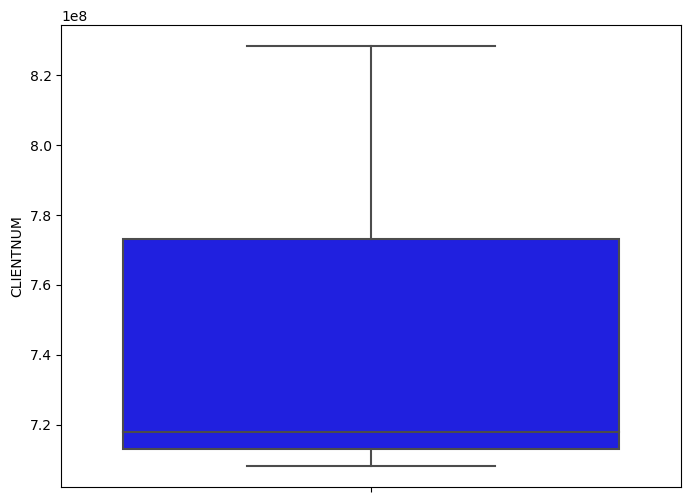

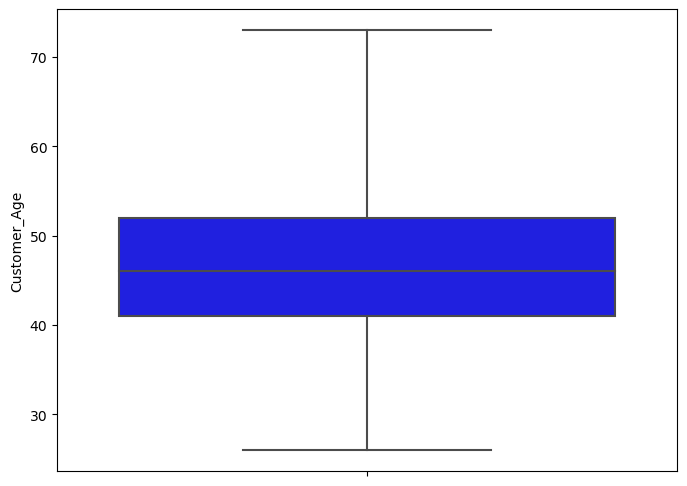

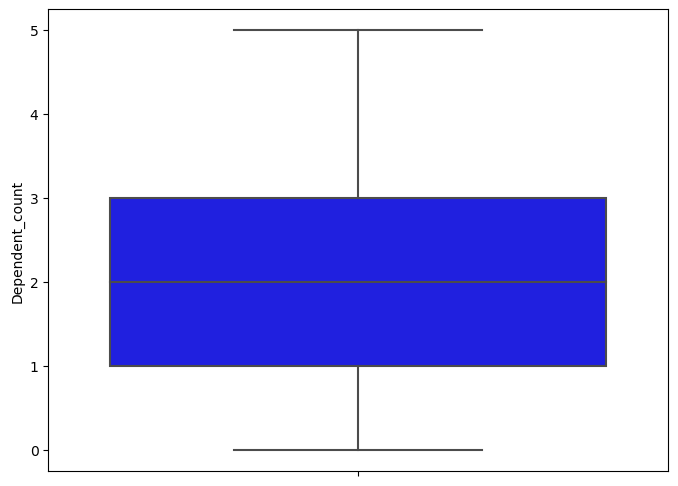

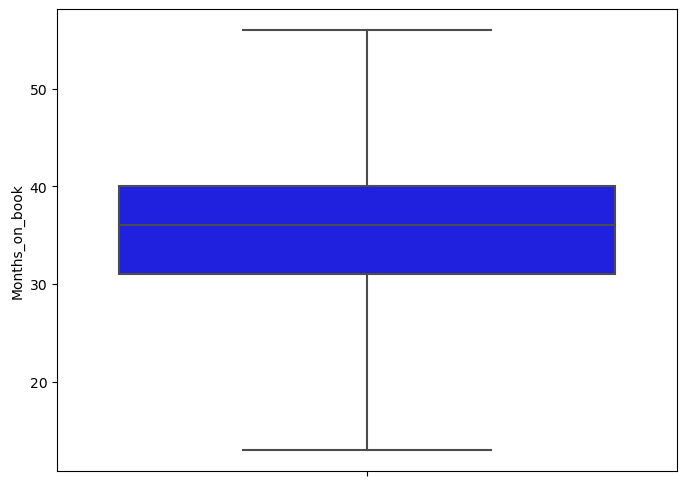

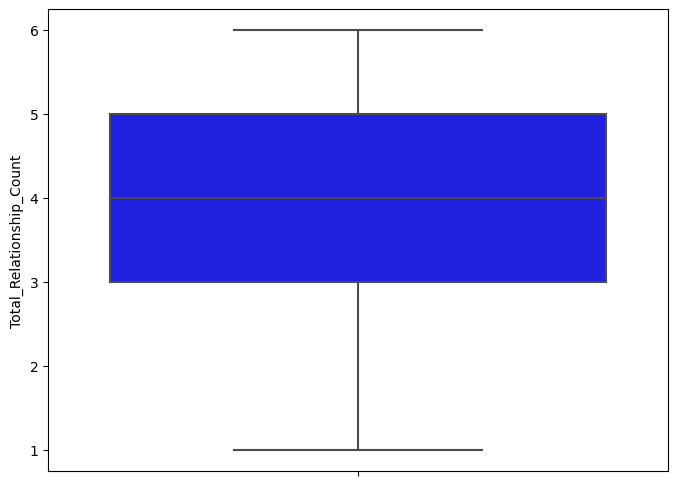

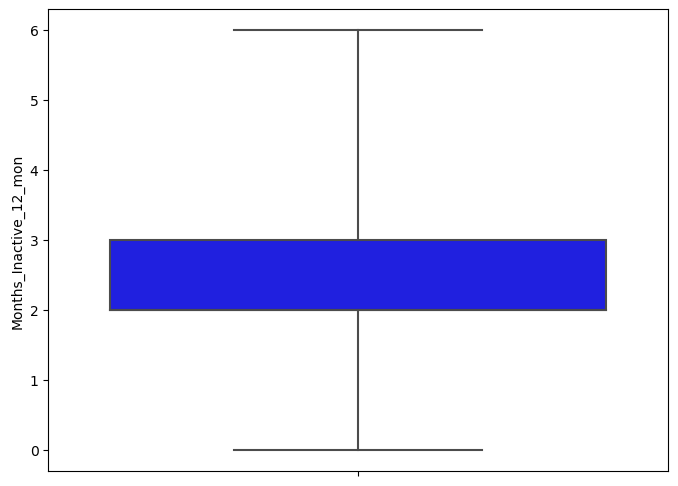

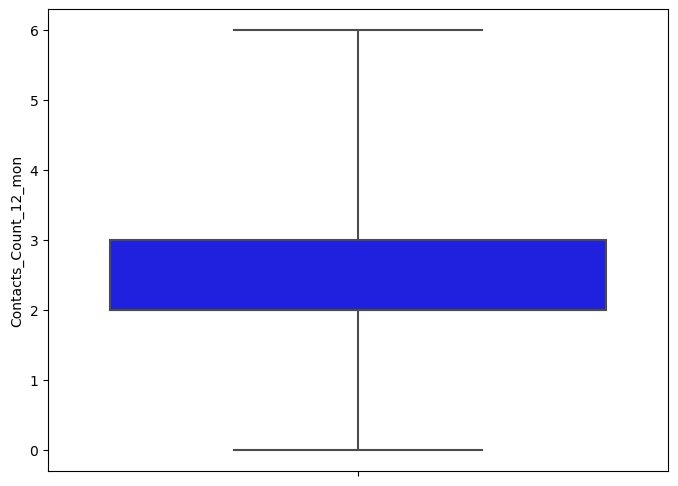

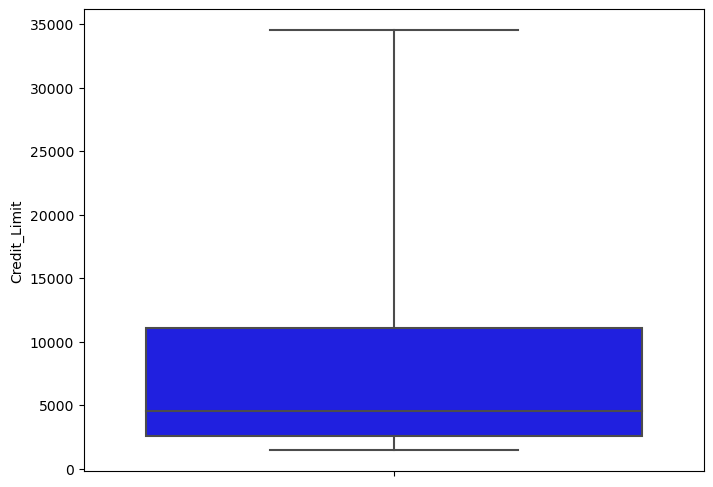

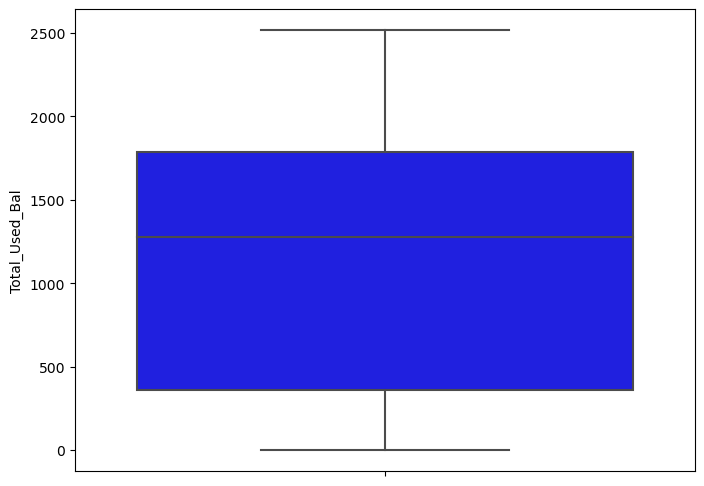

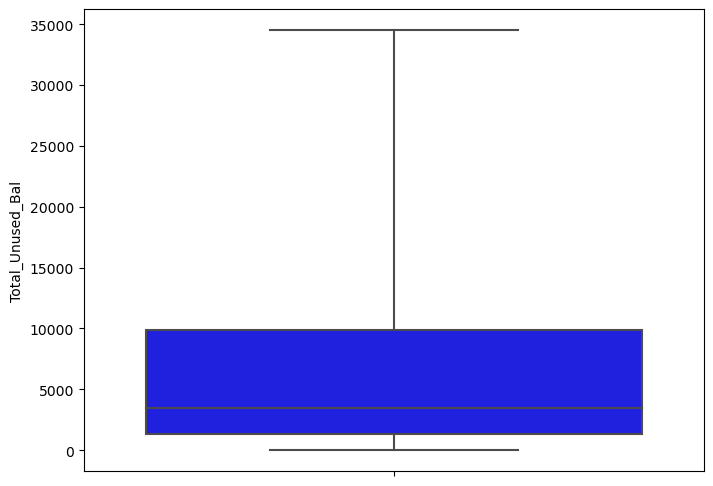

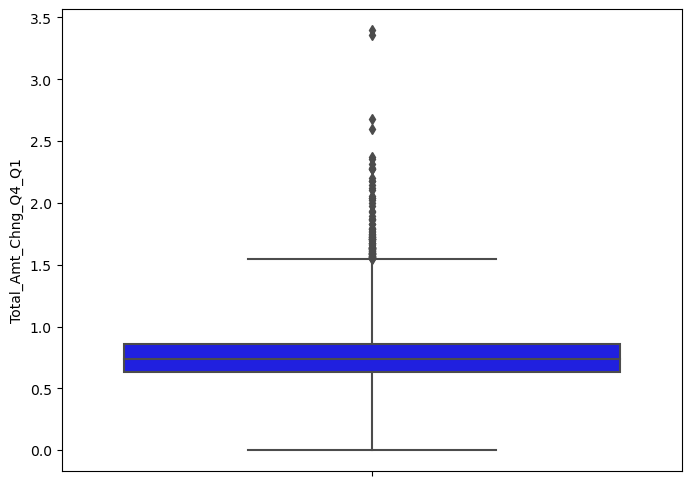

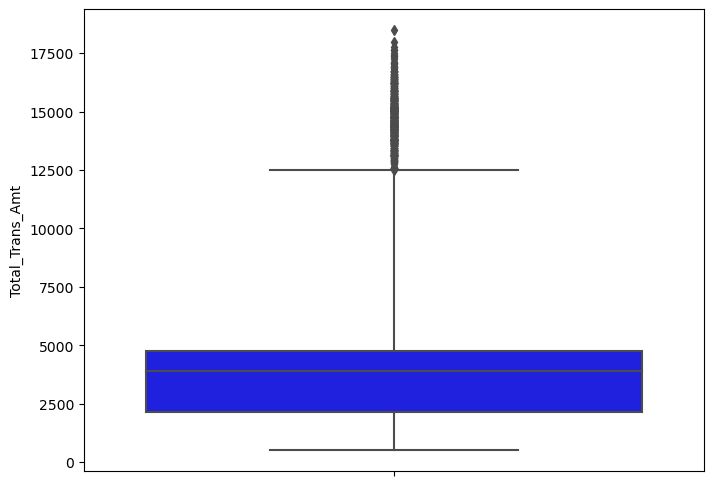

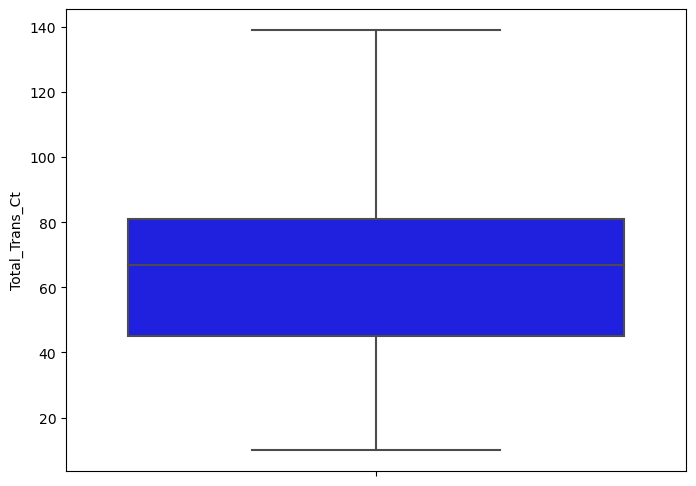

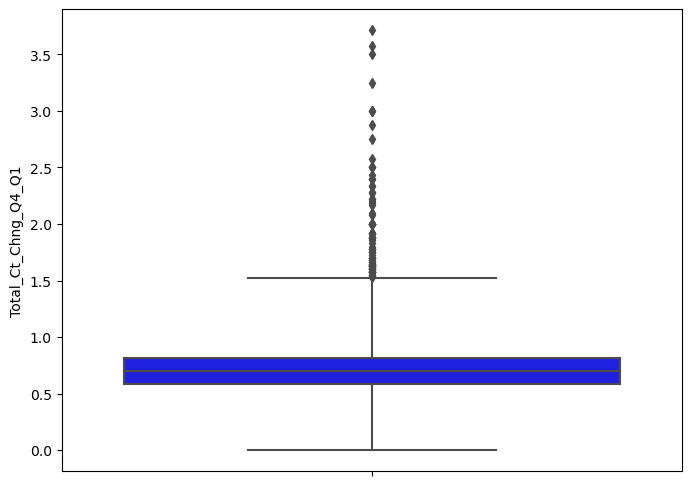

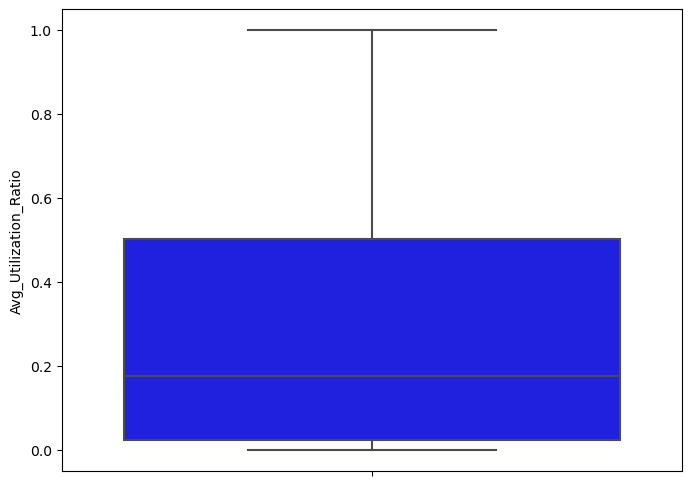

In [157]:
for col in numerical_columns:
    fig,ax = plt.subplots(figsize=(8,6))
    sns.boxplot(y=data[col],color='blue',whis=3)
    plt.show()

In [158]:
correlation = data[numerical_columns].corr()

In [159]:
correlation

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007555,0.007083,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007555,1.000000,-0.122398,0.788891,-0.010931,0.054325,-0.018452,0.002556,0.014729,0.001234,-0.062005,-0.046444,-0.067088,-0.012069,0.007022
Dependent_count,0.007083,-0.122398,1.000000,-0.103357,-0.039238,-0.011519,-0.040601,0.068197,-0.002753,0.068430,-0.035254,0.025521,0.050815,0.010979,-0.037095
Months_on_book,0.134588,0.788891,-0.103357,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039238,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054325,-0.011519,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040601,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002556,0.068197,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Used_Bal,0.000825,0.014729,-0.002753,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Total_Unused_Bal,0.005633,0.001234,0.068430,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


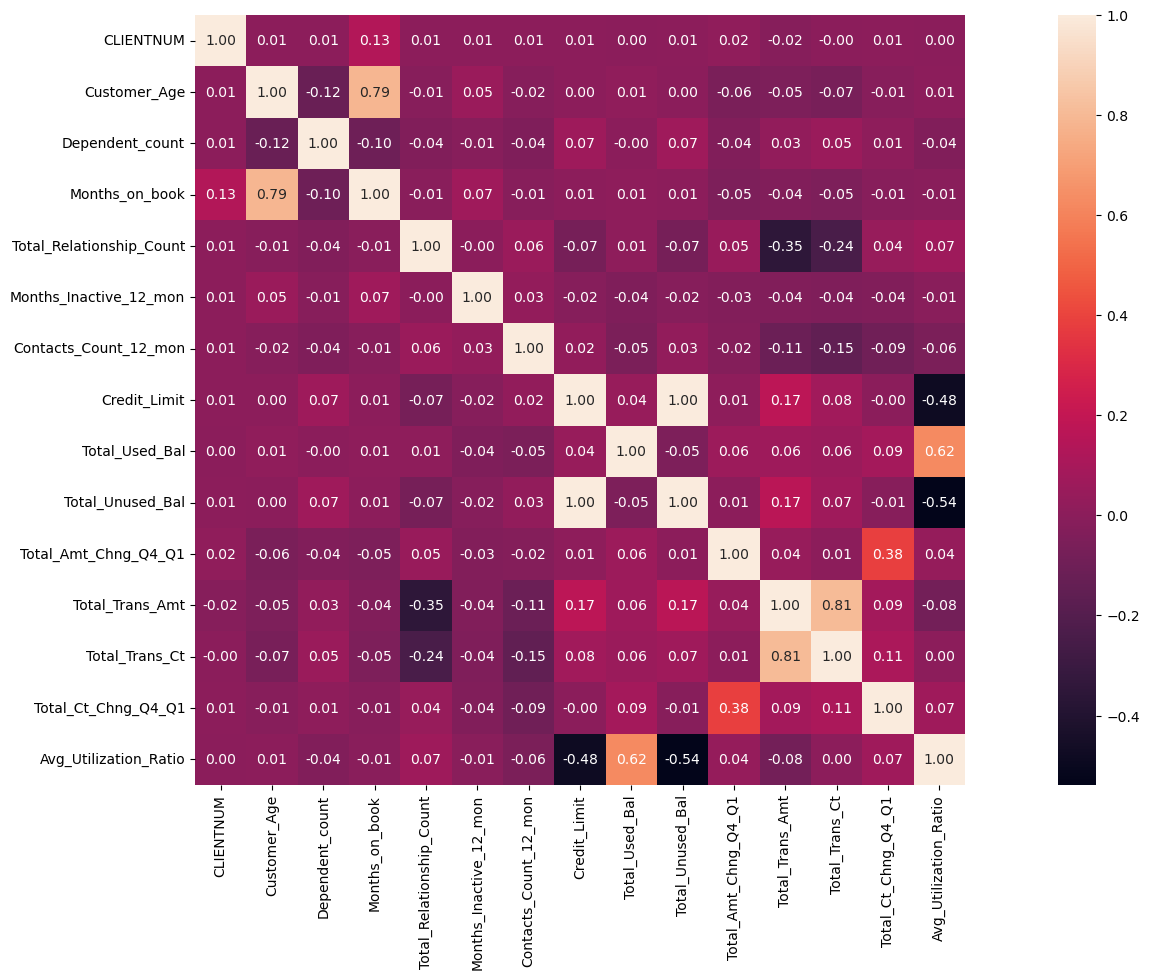

In [160]:
fig,ax=plt.subplots(figsize=(24,10))
sns.heatmap(correlation,annot=True,square=True,fmt='.2f')
plt.show()

*Delete variables with a correlation greater than +-0.95*

In [161]:
columns_to_drop=['Total_Unused_Bal']
numerical_columns.remove('Total_Unused_Bal')

## E. Final Dataset

In [162]:
print(columns_to_drop)

['Total_Unused_Bal']


In [163]:
data=data.drop(columns=columns_to_drop)

In [164]:
#Save dataset
data.to_csv('C:\\Users\\marius\\Desktop\\TTJ project\\dataset\\transformed_dataset.csv')

# II. Model Development

## A. Display the list of columns in the prepared dataset

In [165]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,0,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,0,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,769911858,0,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,709106358,0,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


## B. Classification

### 1. Declare independent variables and target variable

In [166]:
#indepent variables
X=data.drop(columns=['Attrition_Flag'])

#target variable
y=data['Attrition_Flag']

In [167]:
X.shape,y.shape

((10127, 19), (10127,))

In [168]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,769911858,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,709106358,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


### 2. Perform data preprocessing

a) Categorical encoding

In [169]:
X = X.drop(columns= ['CLIENTNUM'])

In [170]:
categorical_columns

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [171]:
X=pd.get_dummies(X,columns=categorical_columns)

In [172]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45.0,3.0,39,5,1,3,12691.0,777,1.335,1144,...,0,0,1,0,0,0,1,0,0,0
1,49.0,5.0,44,6,1,2,8256.0,864,1.541,1291,...,0,0,0,0,1,0,1,0,0,0
2,51.0,3.0,36,4,1,0,3418.0,0,2.594,1887,...,0,0,0,1,0,0,1,0,0,0
3,40.0,4.0,34,3,4,1,3313.0,2517,1.405,1171,...,0,0,0,0,1,0,1,0,0,0
4,40.0,3.0,21,5,1,0,4716.0,0,2.175,816,...,0,0,1,0,0,0,1,0,0,0


### 3. Split train and test sets

In [173]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [174]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8101, 34), (2026, 34), (8101,), (2026,))

### 4. Random Forest

#### 4.1 Train algorithm

a) Instantiate algorithm

In [175]:
rf=RandomForestClassifier(n_estimators=300,max_depth=5,n_jobs=-1,random_state=123)

b) Train algorithm

In [176]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, n_jobs=-1,
                       random_state=123)

#### 4.2 Predict results

In [177]:
y_predict=rf.predict(X_test)

In [178]:
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### 4.3 Performance metrics

a) Accuracy score

In [179]:
accuracy=accuracy_score(y_test,y_predict)

In [180]:
print("Accuracy score for Random Forest Classifier is: ",accuracy)

Accuracy score for Random Forest Classifier is:  0.9190523198420533


***It seems that we have a very high accuracy score***

b) Confusion matrix

In [181]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[1695   10]
 [ 154  167]]


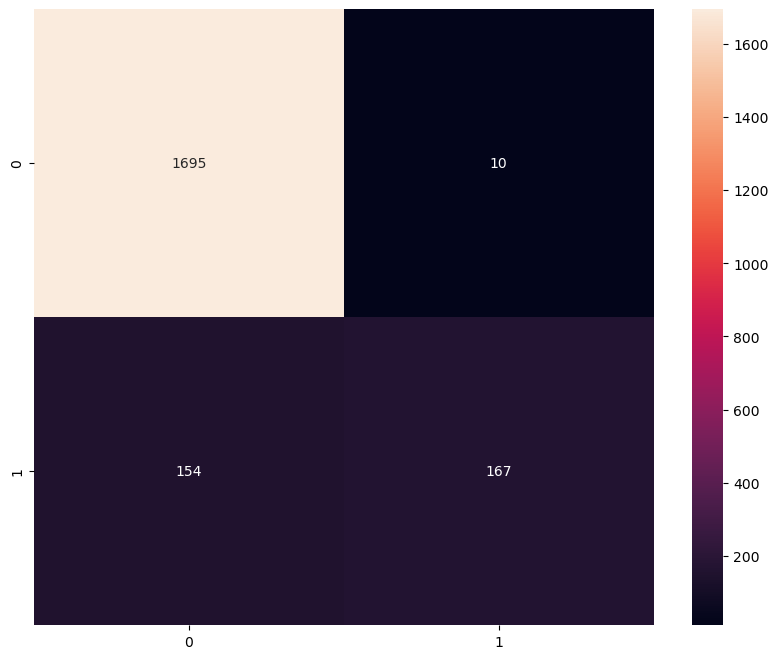

In [182]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

The model has made a total of 2026 predictions and:
- correctly predicted 1695 existing customer
- incorrectly predicted 10 existing customers as attrited customers
- incorrectly predicted 154 attrited customers as existing customers 
- correctly predicted 167 attrited customers

c) Precision, recall

In [183]:
precision=precision_score(y_test,y_predict)
recall=recall_score(y_test,y_predict)
print("Precision score:",precision)
print("Recall score:",recall)

Precision score: 0.943502824858757
Recall score: 0.5202492211838006


***The model is struggling to detect the class, but when it does it is very trustworthy***

In [184]:
#Check for overfitting
y_train_predict=rf.predict(X_train)

In [185]:
precision=precision_score(y_train,y_train_predict)
recall=recall_score(y_train,y_train_predict)
print("Precision score:",precision)
print("Recall score:",recall)

Precision score: 0.926490984743412
Recall score: 0.5114854517611026


d) AUC score

In [186]:
auc_score=roc_auc_score(y_test,y_predict)
print("AUC score is:",auc_score)

AUC score is: 0.7571920592722522


***Model has a moderate ability to distinguish between positive and negative classes***

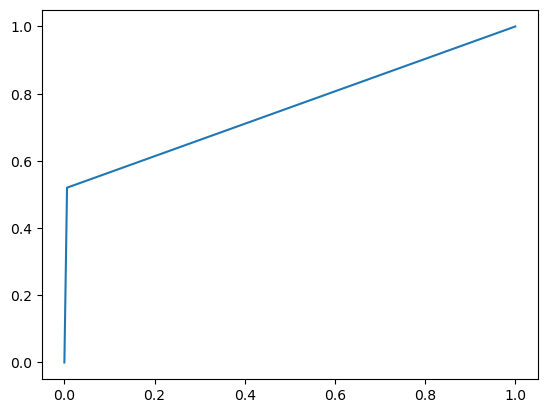

In [187]:
fpr,tpr,threshold=roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)

### 5. XGBoost ( eXtreme Gradient Boosting)

#### 5.1 Train algorithm

In [188]:
xgb= XGBClassifier(n_estimators=200,max_depth=3,learning_rate=0.1,n_jobs=-1,random_state=10)

In [189]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

#### 5.2 Predict results

In [190]:
y_predict=xgb.predict(X_test)

#### 5.3 Performance metrics

a) Accuracy score

In [191]:
accuracy=accuracy_score(y_test,y_predict)
print("Accuracy for XGB is",accuracy)

Accuracy for XGB is 0.9669299111549852


b) Confusion matrix

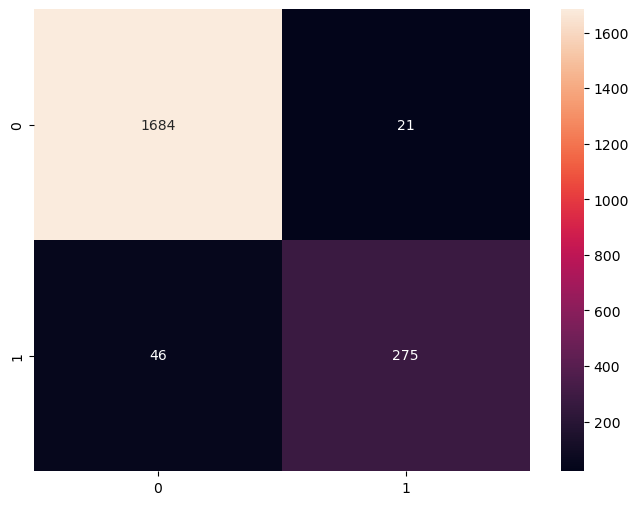

In [192]:
cm=confusion_matrix(y_test,y_predict)
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

The model has made a total of 2026 predictions and:
- correctly predicted 1684 existing customer
- incorrectly predicted 21 existing customers as attrited customers
- incorrectly predicted 46 attrited customers as existing customers 
- correctly predicted 275 attrited customers

c) Precision, recall

In [193]:
precision=precision_score(y_test,y_predict)
recall=recall_score(y_test,y_predict)
print('Precision',precision)
print('Recall',recall)

Precision 0.9290540540540541
Recall 0.8566978193146417


***Precision score and recall score are both high, so the model is differentiating between classes well***

d) AUC score

In [194]:
auc_score=roc_auc_score(y_test,y_predict)
print("AUC score is:",auc_score)

AUC score is: 0.9221905518860598


e) Check for overfitting/ underfitting

In [195]:
y_predict_train=xgb.predict(X_train)
y_predict_test=xgb.predict(X_test)
auc_score_train=roc_auc_score(y_train,y_predict_train)
auc_score_test=roc_auc_score(y_test,y_predict_test)
print('AUC train', auc_score_train)
print('AUC test',auc_score_test)

AUC train 0.966045939553338
AUC test 0.9221905518860598


We have little overfitting

### 6. Hyperparameters tuning

a) Declare possible values for hyperparameters of XGBoost

In [196]:
n_estimators=[200,300]
max_depth=[3,4]
learning_rate=[0.1,0.05]

b) Find the best hyperparameters

In [197]:
results=[]
for est in n_estimators:
    for md in max_depth:
        for lr in learning_rate:
            xgb=XGBClassifier(n_estimators=est,max_depth=md,learning_rate=lr,n_jobs=-1,random_state=10,subsample=0.6,colsample_bytree=0.5)
            xgb.fit(X_train,y_train)
            y_predict=xgb.predict(X_test)
            auc_score=roc_auc_score(y_test,y_predict)
            results.append(['estimators',est,'max_depth',md,'learning_rate',lr,'auc',auc_score])

In [198]:
results

[['estimators',
  200,
  'max_depth',
  3,
  'learning_rate',
  0.1,
  'auc',
  0.9258923269474972],
 ['estimators',
  200,
  'max_depth',
  3,
  'learning_rate',
  0.05,
  'auc',
  0.9069074830304857],
 ['estimators',
  200,
  'max_depth',
  4,
  'learning_rate',
  0.1,
  'auc',
  0.9280364696101807],
 ['estimators',
  200,
  'max_depth',
  4,
  'learning_rate',
  0.05,
  'auc',
  0.9187820319565871],
 ['estimators',
  300,
  'max_depth',
  3,
  'learning_rate',
  0.1,
  'auc',
  0.9280364696101807],
 ['estimators',
  300,
  'max_depth',
  3,
  'learning_rate',
  0.05,
  'auc',
  0.9159600222910442],
 ['estimators',
  300,
  'max_depth',
  4,
  'learning_rate',
  0.1,
  'auc',
  0.9295941020089347],
 ['estimators',
  300,
  'max_depth',
  4,
  'learning_rate',
  0.05,
  'auc',
  0.925983683686427]]

Check for overfitting

Model with parameters n_estimators=300, max_depth=4, learning_rate=0.1 with auc_score 0.9295941020089347 is better.

In [199]:
best_model=XGBClassifier(n_estimators=300,max_depth=4,learning_rate=0.05,n_jobs=-1,subsample=0.6,colsample_bytree=0.5,random_state=10)
best_model.fit(X_train,y_train)
y_predict_train=best_model.predict(X_train)
y_predict_test=best_model.predict(X_test)
auc_score_train=roc_auc_score(y_train,y_predict_train)
auc_score_test=roc_auc_score(y_test,y_predict_test)
print("AUC train",auc_score_train)
print("AUC test",auc_score_test)

AUC train 0.9721565830203499
AUC test 0.925983683686427


### 7. Save the model

In [200]:
import pickle
with open('C:\\Users\\marius\\Desktop\\TTJ project\\final_model_v1.pkl','wb') as file:
          pickle.dump(best_model,file)

# III. Model explainability


## 1. Predict

In [201]:
y_predict=best_model.predict(X_test)

In [202]:
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [203]:
y_predict_proba = best_model.predict_proba(X_test)

In [204]:
y_predict_proba

array([[9.6530378e-01, 3.4696210e-02],
       [9.9405819e-01, 5.9417957e-03],
       [9.9737358e-01, 2.6264251e-03],
       ...,
       [9.0607405e-03, 9.9093926e-01],
       [9.9946165e-01, 5.3833623e-04],
       [9.2194426e-01, 7.8055732e-02]], dtype=float32)

In [205]:
y_predict_proba_class_1=y_predict_proba[:,1]

In [206]:
y_predict_proba_class_1

array([3.4696210e-02, 5.9417957e-03, 2.6264251e-03, ..., 9.9093926e-01,
       5.3833623e-04, 7.8055732e-02], dtype=float32)

## 2. Performance metrics

### 4.1 AUC score for probabilities

In [207]:
auc_score=roc_auc_score(y_test,y_predict_proba_class_1)
print(auc_score)

0.9928339773983428


### 4.2 Lift and Gain analysis

In [208]:
#declare an empty DataFrame
lift_gain_report=pd.DataFrame()

# add y_test in DataFrame
lift_gain_report['y_test']=y_test

#### STEP 1 ####
# add predict probabilities for class 1 in DataFrame
lift_gain_report['Predicted Probabilities']=y_predict_proba_class_1

# order probabilities in ascending order
lift_gain_report['Probabilities Rank'] = lift_gain_report['Predicted Probabilities'].rank(method='first',ascending=True,pct=True)

#### STEP 2 ####
# calculate decile group
lift_gain_report['Decile group']=np.floor((1-lift_gain_report['Probabilities Rank'])*10)+1

#### STEP 3 ####
# group observations by decile
lift_gain_report['Number of observations']=1
lift_gain_report = lift_gain_report.groupby(['Decile group']).sum().reset_index()

# cumulative number of observations
lift_gain_report['Cumulative no. of observations']=lift_gain_report['Number of observations'].cumsum()

#cumulative percentage of observations
lift_gain_report['Cumulative % of no. of observations'] = lift_gain_report['Cumulative no. of observations']/lift_gain_report['Cumulative no. of observations'].max()

#### STEP 4 ####
# calculate number of positives cumulative
lift_gain_report['Cumulative no. of positives']=lift_gain_report['y_test'].cumsum()

#### STEP 5 ####
#calculate cumulative percentage of positives (Gain)
lift_gain_report['Gain']=lift_gain_report['Cumulative no. of positives']/lift_gain_report['Cumulative no. of positives'].max()

#### STEP 6 ####
#calculate Lift
lift_gain_report['Lift']=lift_gain_report['Gain']/lift_gain_report['Cumulative % of no. of observations']

#display
lift_gain_report

,Decile group,y_test,Predicted Probabilities,Probabilities Rank,Number of observations,Cumulative no. of observations,Cumulative % of no. of observations,Cumulative no. of positives,Gain,Lift
0,1.0,200,196.715088,192.880059,203,203,0.100197,200,0.623053,6.218253
1,2.0,109,98.372765,172.539980,203,406,0.200395,309,0.962617,4.803600
2,3.0,11,13.189112,151.500000,202,608,0.300099,320,0.996885,3.321856
3,4.0,1,3.599189,131.960020,203,811,0.400296,321,1.000000,2.498150
4,5.0,0,1.458662,111.119941,202,1013,0.500000,321,1.000000,2.000000
5,6.0,0,0.729315,91.380059,203,1216,0.600197,321,1.000000,1.666118
6,7.0,0,0.395329,71.039980,203,1419,0.700395,321,1.000000,1.427766
7,8.0,0,0.230668,50.500000,202,1621,0.800099,321,1.000000,1.249846
8,9.0,0,0.144879,30.460020,203,1824,0.900296,321,1.000000,1.110746
9,10.0,0,0.071555,10.119941,202,2026,1.000000,321,1.000000,1.000000


### 4.3 Lift and Gain charts

a) Lift chart

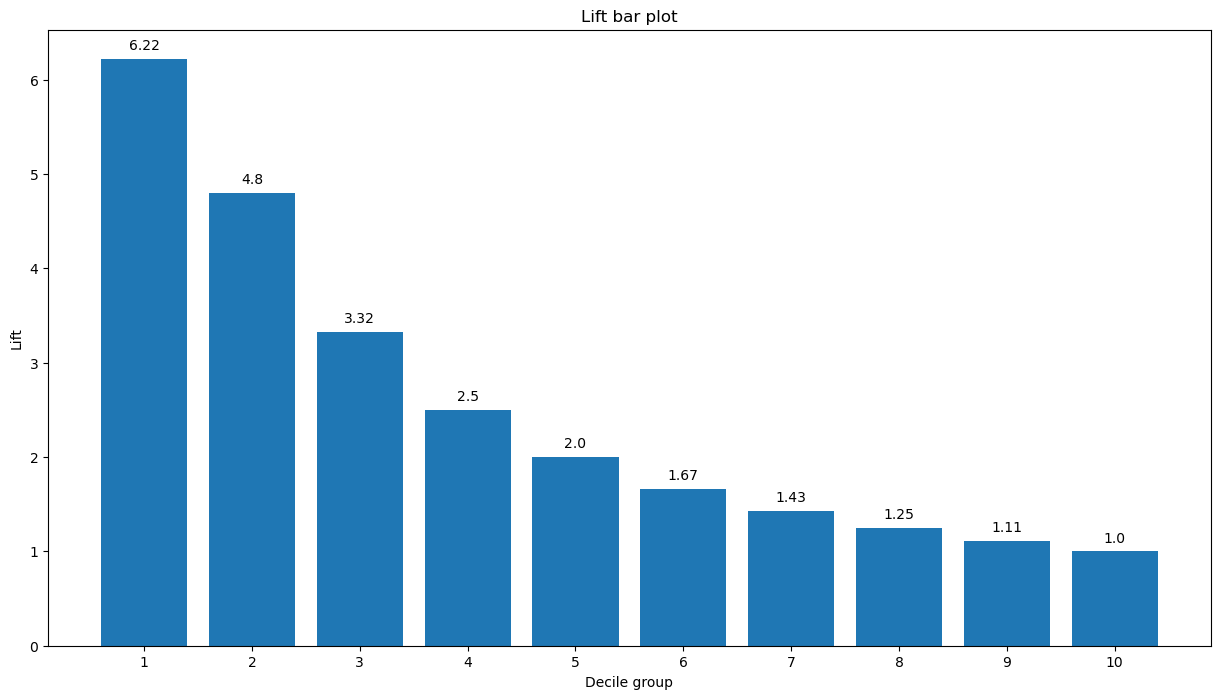

In [209]:
fig,ax=plt.subplots(figsize=(15,8))
barplot = plt.bar(lift_gain_report['Decile group'],lift_gain_report['Lift'])
plt.title('Lift bar plot')
plt.xlabel('Decile group')
plt.ylabel('Lift')
plt.xticks(lift_gain_report['Decile group'])
for b in barplot:
    plt.text(b.get_x()+b.get_width()/2,b.get_height()+0.1,round(b.get_height(),2),ha='center')
    
plt.show()

b) Gain chart

In [210]:
lift_gain_report['Random Selection']=lift_gain_report['Decile group']/lift_gain_report['Decile group'].max()
lift_gain_report

,Decile group,y_test,Predicted Probabilities,Probabilities Rank,Number of observations,Cumulative no. of observations,Cumulative % of no. of observations,Cumulative no. of positives,Gain,Lift,Random Selection
0,1.0,200,196.715088,192.880059,203,203,0.100197,200,0.623053,6.218253,0.1
1,2.0,109,98.372765,172.539980,203,406,0.200395,309,0.962617,4.803600,0.2
2,3.0,11,13.189112,151.500000,202,608,0.300099,320,0.996885,3.321856,0.3
3,4.0,1,3.599189,131.960020,203,811,0.400296,321,1.000000,2.498150,0.4
4,5.0,0,1.458662,111.119941,202,1013,0.500000,321,1.000000,2.000000,0.5
5,6.0,0,0.729315,91.380059,203,1216,0.600197,321,1.000000,1.666118,0.6
6,7.0,0,0.395329,71.039980,203,1419,0.700395,321,1.000000,1.427766,0.7
7,8.0,0,0.230668,50.500000,202,1621,0.800099,321,1.000000,1.249846,0.8
8,9.0,0,0.144879,30.460020,203,1824,0.900296,321,1.000000,1.110746,0.9
9,10.0,0,0.071555,10.119941,202,2026,1.000000,321,1.000000,1.000000,1.0


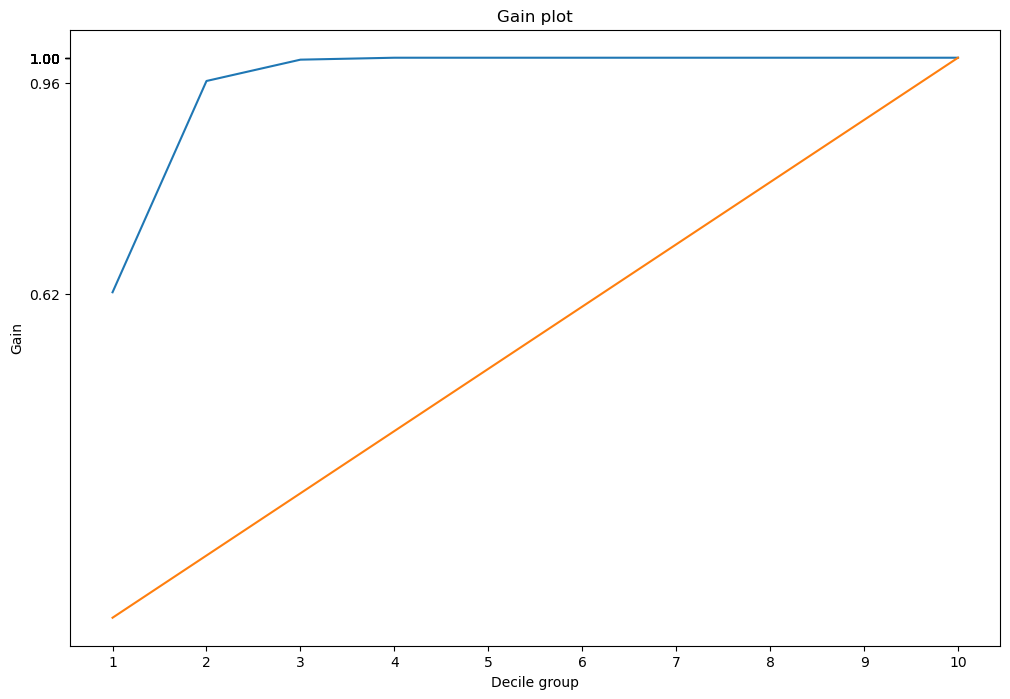

In [211]:
fig,ax=plt.subplots(figsize=(12,8))
sns.lineplot(data=lift_gain_report,x=lift_gain_report['Decile group'],y=lift_gain_report['Gain'])
sns.lineplot(data=lift_gain_report,x=lift_gain_report['Decile group'],y=lift_gain_report['Random Selection'])
plt.title('Gain plot')
plt.xticks(lift_gain_report['Decile group'])
plt.yticks(round(lift_gain_report['Gain'],2))
plt.show()

At decile 1 we have a gain of 0.62, at decile 2 we have a gain of 0.96, and for the rest we have a gain of 1 for our model that identifies customers who are likely to churn.





## 5. Feature importance

In [212]:
feat_imp=best_model.get_booster().get_score(importance_type='total_gain')

In [213]:
feat_imp

{'Customer_Age': 1469.1427001953125,
 'Dependent_count': 160.1858367919922,
 'Months_on_book': 524.0332641601562,
 'Total_Relationship_Count': 3175.410888671875,
 'Months_Inactive_12_mon': 1076.1318359375,
 'Contacts_Count_12_mon': 888.9921264648438,
 'Credit_Limit': 891.5821533203125,
 'Total_Used_Bal': 4856.416015625,
 'Total_Amt_Chng_Q4_Q1': 2729.885009765625,
 'Total_Trans_Amt': 9874.345703125,
 'Total_Trans_Ct': 9422.09375,
 'Total_Ct_Chng_Q4_Q1': 4058.90625,
 'Avg_Utilization_Ratio': 1227.8685302734375,
 'Gender_F': 167.1801300048828,
 'Gender_M': 205.22471618652344,
 'Education_Level_Graduate': 28.334129333496094,
 'Education_Level_High School': 6.901286602020264,
 'Education_Level_Other education': 20.29196548461914,
 'Education_Level_Uneducated': 20.289430618286133,
 'Education_Level_Unknown': 12.366117477416992,
 'Marital_Status_Divorced': 9.410865783691406,
 'Marital_Status_Married': 134.2130126953125,
 'Marital_Status_Single': 44.378910064697266,
 'Marital_Status_Unknown': 

In [214]:
feature_importance=pd.DataFrame()
feature_importance['Variable']=feat_imp.keys()
feature_importance['Importance value']=feat_imp.values()
feature_importance['% Importance value'] = feature_importance['Importance value']/feature_importance['Importance value'].sum()*100
feature_importance.sort_values(by=['Importance value'],ascending=False)

,Variable,Importance value,% Importance value
9,Total_Trans_Amt,9874.345703,23.972379
10,Total_Trans_Ct,9422.093750,22.874427
7,Total_Used_Bal,4856.416016,11.790132
11,Total_Ct_Chng_Q4_Q1,4058.906250,9.853983
3,Total_Relationship_Count,3175.410889,7.709083
8,Total_Amt_Chng_Q4_Q1,2729.885010,6.627461
0,Customer_Age,1469.142700,3.566702
12,Avg_Utilization_Ratio,1227.868530,2.980950
4,Months_Inactive_12_mon,1076.131836,2.612572
6,Credit_Limit,891.582153,2.164533


### 5.2 SHAP chart

### 5.2.1 SHAP chart for model

In [215]:
explainer=shap.TreeExplainer(best_model)
shap_values=explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


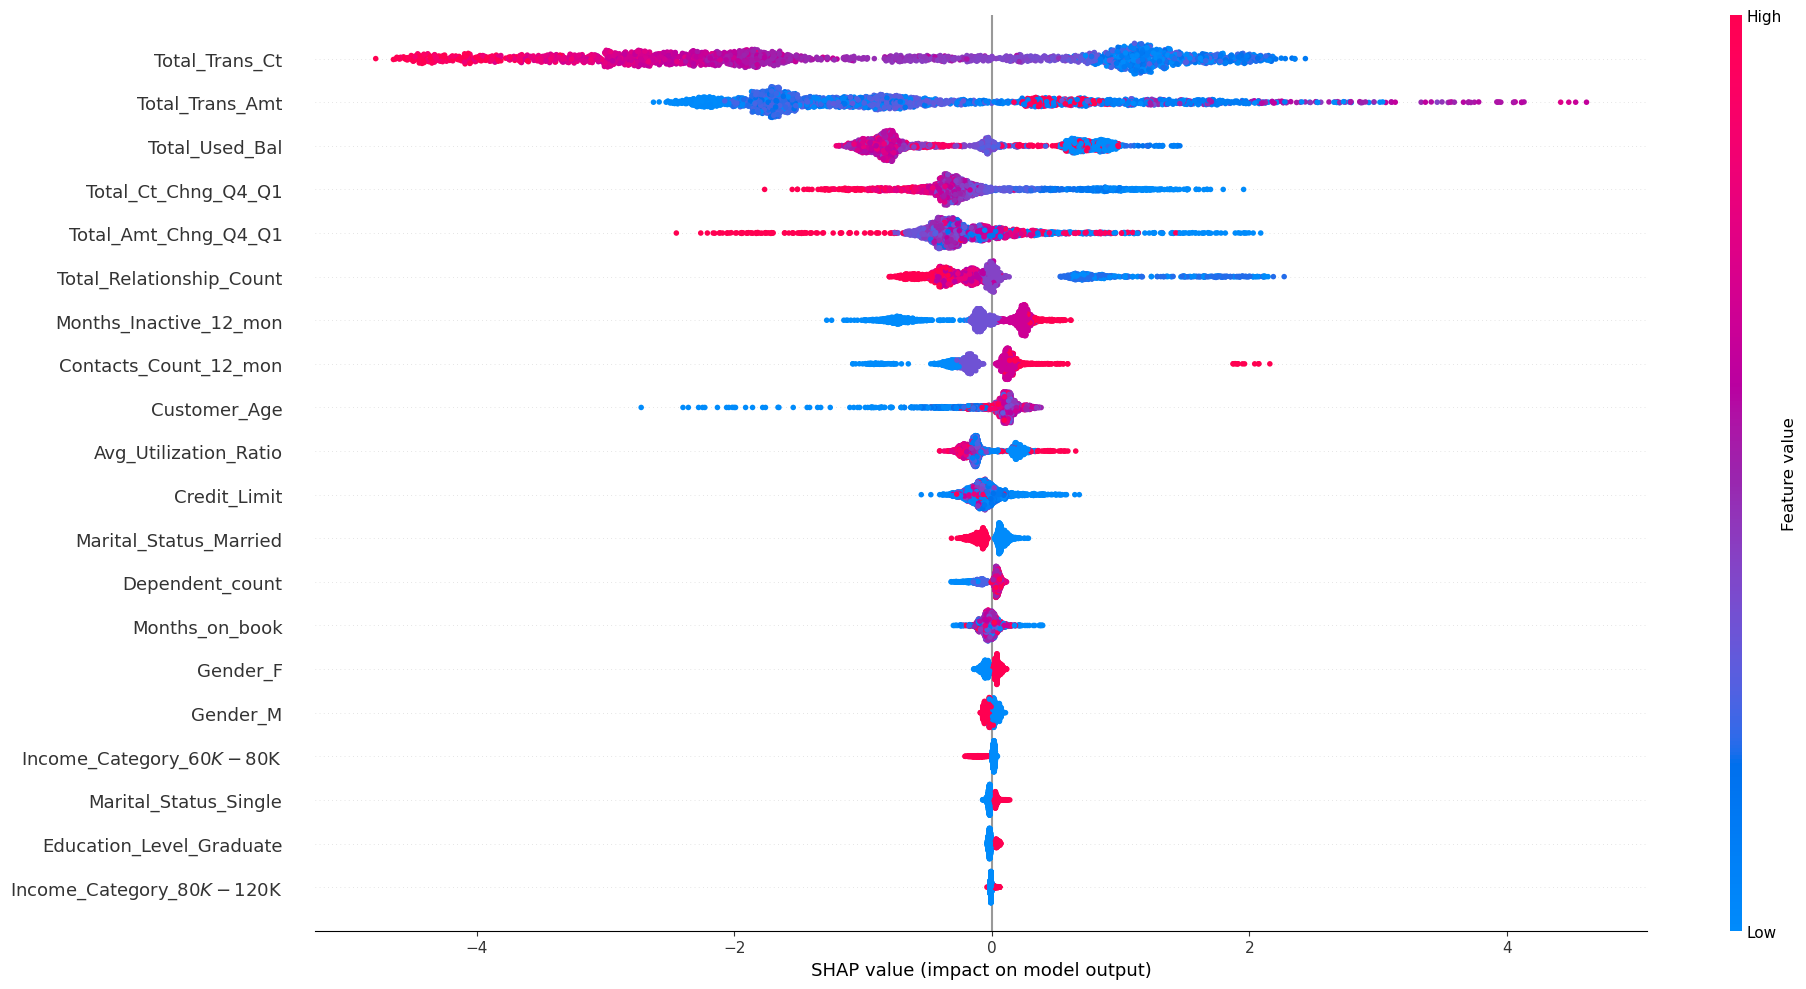

In [216]:
shap.summary_plot(shap_values,X_test,plot_size=(20,10))

***Most important factors in churn are:***
- Total_Trans_CT (Total number of payments made in last 12 months)
- Total_Trans_Amt (Total amount of payments made in last 12 moths)
- Total_Relationship_Count (Number of products in portfolio)


### 5.2.2 SHAP 1 single observation

In [217]:
index=756
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[index],X_test.iloc[index])

# IV. Conclusion

> ***`The most probable clients that will churn in the future are those clients who have made fewer payments in last 12 months or those clients who have transacted large amounts of money in the payments of the last 12 months, indicating that the customer may not be satisfied and wants to leave the bank. Also, the decrease of the Total_Trans_Amt variable can represent an important factor in identifying clients who are likely to churn from the bank because it may represent the fact that the client is inactive or has less money to spend.`***